In [1]:
import os  
import time  
from sklearn import metrics  
import numpy as np  
import scipy.io as sio  
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from pyecharts.charts import Parallel
from pandas.plotting import parallel_coordinates
import plotly as py
import plotly.graph_objs as go
from sklearn.multiclass import OneVsRestClassifier
import scipy.stats
import scipy.io as scio
from sklearn import preprocessing
import SSA as SSA

In [2]:
data = pd.read_excel(r'D:\材料资料\参考数据.xlsx', 'Sheet2')
data

Alloy          δ         a       VEC      σVEC      ΔHmix  \
0                  AlB12  18.807933  0.086708  3.000000  0.000000   0.000000   
1                   B4Co  19.024498  0.090620  4.200000  2.400000 -15.360000   
2                   AlB2  28.173786  0.102400  3.000000  0.000000   0.000000   
3               B6Co2Nb2  25.378555  0.102800  4.600000  2.332381 -41.440000   
4                   HfB2  33.311805  0.107267  3.333333  0.471405 -58.666667   
..                   ...        ...       ...       ...       ...        ...   
756  Al0.5CoCrCuFeNiTi2    7.308892  0.132067  7.133333  2.753584 -16.533333   
757  CrMo0.5NbTa0.5TiZr    8.042356  0.142790  4.900000  0.830662  -4.920000   
758            CrNbTiZr    8.781341  0.143575  4.750000  0.829156  -5.000000   
759          CrHfNbTiZr    8.626539  0.146420  4.600000  0.800000  -4.000000   
760  AlMo0.5NbTa0.5TiZr    5.041025  0.146450  4.300000  0.900000 -16.840000   

         ΔSmix         χ        Δχ           K          σK           Tm  \
0     2.254668  2.006923  0.114582  301.230769   65.018523  2239.190000   
1     4.160346  2.008000  0.064000  292.000000   56.000000  2232.000000   
2     5.291979  1.896667  0.202704  238.666667  115.022703  1876.490000   
3     7.900549  1.920000  0.171581  262.000000   71.105555  2312.400000   
4     5.291979  1.793333  0.348839  250.000000   98.994949  2400.666667   
..         ...       ...       ...         ...         ...          ...   
756  15.599339  1.742000  0.153632  145.066667   32.975681  1759.254000   
757  14.533432  1.592000  0.219809  131.000000   73.817342  2418.550000   
758  11.525651  1.532500  0.124373  110.000000   67.453688  2249.900000   
759  13.380867  1.486000  0.144997  110.000000   60.332413  2301.150000   
760  14.533432  1.582000  0.217614  114.200000   74.856930  2169.214000   

            σT  Phase  
0    16.833270     IM  
1    10.394265     IM  
2    35.535273     IM  
3    13.560873     IM  
4     3.102551     IM  
..         ...    ...  
756  17.965691  SS+IM  
757  18.238989  SS+IM  
758  13.431072  SS+IM  
759  12.561810  SS+IM  
760  34.563768  SS+IM  

[761 rows x 14 columns]

In [3]:
data=data.rename(columns={"δ":'$\delta$',"a":'$a$','VEC':'$VEC$',"σVEC":'${\sigma _{VEC}}$','ΔHmix':'$\Delta {H_{mix}}$','ΔSmix':'$\Delta {S_{mix}}$',
                        "χ" :'$\chi$',"Δχ":'$\Delta \chi$','K':'$K$','σK':'${\sigma _K}$','Tm':'${T_m}$'})
data

Alloy   $\delta$       $a$     $VEC$  ${\sigma _{VEC}}$  \
0                  AlB12  18.807933  0.086708  3.000000           0.000000   
1                   B4Co  19.024498  0.090620  4.200000           2.400000   
2                   AlB2  28.173786  0.102400  3.000000           0.000000   
3               B6Co2Nb2  25.378555  0.102800  4.600000           2.332381   
4                   HfB2  33.311805  0.107267  3.333333           0.471405   
..                   ...        ...       ...       ...                ...   
756  Al0.5CoCrCuFeNiTi2    7.308892  0.132067  7.133333           2.753584   
757  CrMo0.5NbTa0.5TiZr    8.042356  0.142790  4.900000           0.830662   
758            CrNbTiZr    8.781341  0.143575  4.750000           0.829156   
759          CrHfNbTiZr    8.626539  0.146420  4.600000           0.800000   
760  AlMo0.5NbTa0.5TiZr    5.041025  0.146450  4.300000           0.900000   

     $\Delta {H_{mix}}$  $\Delta {S_{mix}}$    $\chi$  $\Delta \chi$  \
0              0.000000            2.254668  2.006923       0.114582   
1            -15.360000            4.160346  2.008000       0.064000   
2              0.000000            5.291979  1.896667       0.202704   
3            -41.440000            7.900549  1.920000       0.171581   
4            -58.666667            5.291979  1.793333       0.348839   
..                  ...                 ...       ...            ...   
756          -16.533333           15.599339  1.742000       0.153632   
757           -4.920000           14.533432  1.592000       0.219809   
758           -5.000000           11.525651  1.532500       0.124373   
759           -4.000000           13.380867  1.486000       0.144997   
760          -16.840000           14.533432  1.582000       0.217614   

            $K$  ${\sigma _K}$      ${T_m}$         σT  Phase  
0    301.230769      65.018523  2239.190000  16.833270     IM  
1    292.000000      56.000000  2232.000000  10.394265     IM  
2    238.666667     115.022703  1876.490000  35.535273     IM  
3    262.000000      71.105555  2312.400000  13.560873     IM  
4    250.000000      98.994949  2400.666667   3.102551     IM  
..          ...            ...          ...        ...    ...  
756  145.066667      32.975681  1759.254000  17.965691  SS+IM  
757  131.000000      73.817342  2418.550000  18.238989  SS+IM  
758  110.000000      67.453688  2249.900000  13.431072  SS+IM  
759  110.000000      60.332413  2301.150000  12.561810  SS+IM  
760  114.200000      74.856930  2169.214000  34.563768  SS+IM  

[761 rows x 14 columns]

In [4]:
X=data.iloc[:,1:-1]

y=data.iloc[:,-1]

In [5]:
# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [6]:
X_train=pd.DataFrame(X_train)
X_train

$\delta$       $a$     $VEC$  ${\sigma _{VEC}}$  $\Delta {H_{mix}}$  \
720  19.283522  0.116592  6.461538           2.560510          -39.668639   
704   3.146080  0.125568  8.090823           1.603855           -7.024813   
239   3.547458  0.136390  9.700000           1.307670          -10.450000   
358   7.476344  0.142317  4.666667           1.105542          -16.111111   
253  14.888974  0.136917  9.666667           2.981424          -11.666667   
..         ...       ...       ...                ...                 ...   
707   0.279596  0.124720  7.800000           1.600000           -4.320000   
192   8.302578  0.133325  7.750000           2.772634          -32.280000   
629   6.623720  0.132215  6.538462           3.177212           -8.520710   
559   5.700024  0.128183  8.137931           2.300287           -6.634958   
684   6.988761  0.131833  7.500000           2.986079          -16.777778   

     $\Delta {S_{mix}}$    $\chi$  $\Delta \chi$         $K$  ${\sigma _K}$  \
720           14.784232  1.956154       0.342020  125.461538      61.263134   
704           12.586488  1.809225       0.105577  172.377556       8.103944   
239            1.650456  2.185000       0.065383  176.000000      17.435596   
358           14.896688  1.633333       0.257272  141.138889      60.376935   
253            3.745966  1.770000       0.290689  120.333333      43.976004   
..                  ...       ...            ...         ...            ...   
707           11.075737  1.788000       0.107592  170.000000       8.944272   
192            8.835600  1.759000       0.193905  161.000000      29.647934   
629           12.632147  1.742308       0.130805  129.230769      43.652745   
559           14.870723  1.795172       0.133226  158.275862      23.790605   
684           14.896688  1.778333       0.147356  142.666667      38.844419   

         ${T_m}$         σT  
720  2177.814615  44.531716  
704  1914.914622  13.503924  
239  1820.997500   1.688148  
358  2228.078333  33.509095  
253  1309.975000   8.158390  
..           ...        ...  
707  1933.550000  10.501529  
192  1962.800000  19.122644  
629  1447.830000  32.241754  
559  1792.808621  13.935390  
684  1589.973333  21.604829  

[646 rows x 12 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
#print(y_test)
sc2 = MinMaxScaler()
X_train = sc2.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)
print(X_train)

[[0.57531503 0.31111677 0.47727273 ... 0.44008064 0.6082487  0.65622016]
 [0.08677846 0.40455513 0.63773253 ... 0.05517259 0.51636198 0.19325577]
 [0.09892957 0.51722263 0.79621212 ... 0.12273999 0.48353682 0.01695307]
 ...
 [0.19205873 0.47376238 0.48484848 ... 0.31256965 0.35311028 0.47284214]
 [0.16409524 0.43178032 0.642372   ... 0.16875449 0.47368446 0.19969365]
 [0.2031098  0.46978499 0.57954545 ... 0.27775416 0.40279109 0.31412903]]


In [8]:
X_train=pd.DataFrame(X_train,columns=['$\delta$','$a$','$VEC$','${\sigma _{VEC}}$','$\Delta {H_{mix}}$','$\Delta {S_{mix}}$',
                        '$\chi$','$\Delta \chi$','$K$','${\sigma _K}$','${T_m}$','${\sigma _T}$'])
X_train

$\delta$       $a$     $VEC$  ${\sigma _{VEC}}$  $\Delta {H_{mix}}$  \
0    0.575315  0.311117  0.477273           0.473519            0.363689   
1    0.086778  0.404555  0.637733           0.296604            0.782737   
2    0.098930  0.517223  0.796212           0.241830            0.738768   
3    0.217871  0.578923  0.300505           0.204450            0.666096   
4    0.442277  0.522706  0.792929           0.551360            0.723149   
..        ...       ...       ...                ...                 ...   
641  0.000000  0.395731  0.609091           0.295891            0.817458   
642  0.242884  0.485314  0.604167           0.512748            0.458537   
643  0.192059  0.473762  0.484848           0.587567            0.763534   
644  0.164095  0.431780  0.642372           0.425396            0.787741   
645  0.203110  0.469785  0.579545           0.552221            0.657538   

     $\Delta {S_{mix}}$    $\chi$  $\Delta \chi$       $K$  ${\sigma _K}$  \
0              0.790369  0.600512       0.684466  0.361920       0.440081   
1              0.658113  0.488889       0.211285  0.532235       0.055173   
2              0.000000  0.774368       0.130848  0.545385       0.122740   
3              0.797137  0.355263       0.514864  0.418832       0.433664   
4              0.126104  0.459090       0.581740  0.343303       0.314910   
..                  ...       ...            ...       ...            ...   
641            0.567198  0.472765       0.215318  0.523604       0.061257   
642            0.432390  0.450733       0.388051  0.490932       0.211165   
643            0.660860  0.438052       0.261774  0.375603       0.312570   
644            0.795574  0.478213       0.266618  0.481043       0.168754   
645            0.797137  0.465421       0.294896  0.424378       0.277754   

      ${T_m}$  ${\sigma _T}$  
0    0.608249       0.656220  
1    0.516362       0.193256  
2    0.483537       0.016953  
3    0.625816       0.491752  
4    0.304928       0.113495  
..        ...            ...  
641  0.522875       0.148457  
642  0.533099       0.277092  
643  0.353110       0.472842  
644  0.473684       0.199694  
645  0.402791       0.314129  

[646 rows x 12 columns]

In [11]:
import xgboost as xgb
def fun3(X):
    
    #训练XGBClassifier
    
    Learning_rate3= X[0]#随机森林个数
    Max_depth3=int(X[1])
    Gamma3 = X[2]#最大特征数
    N_estimators3=int(X[3])
    Subsample3=X[4]
#     Min_samples_leaf=int(X[2])
#     n_features= train_wine.shape[1]#特征数
    Model3=xgb.XGBClassifier(objective='multi:softproba', n_estimators=N_estimators3,subsample=Subsample3,max_depth=Max_depth3, 
                            learning_rate=Learning_rate3,gamma=Gamma3)
 
    Model3.fit(X_train, y_train)#训练
    tra_label=Model3.predict(X_train) #训练集预测
    tes_label=Model3.predict(X_test) #测试集预测
    output = 2 - accuracy_score(y_test,tes_label) - accuracy_score(y_train,tra_label)#计算错误率，如果错误率越小，结果越优 
    return output
#设置麻雀参数
pop = 20 #种群数量
MaxIter = 10 #最大迭代次数
dim = 5 #维度
lb = np.matrix([[0.1],[1],[0.1],[100],[0.1]]) #下边界
ub = np.matrix([[1],[50],[1],[300],[1]])#上边界
fobj = fun3
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)

Learning_rate3= GbestPositon[0,0]
Max_depth3=int(GbestPositon[0,1])#最大特征数
Gamma3=GbestPositon[0,2]
N_estimators3=int(GbestPositon[0,3])
Subsample3=GbestPositon[0,4]
# n_features= train_wine.shape[1]#特征数
print('最优适应度值：',GbestScore)
print('Learning_rate3最优解：',GbestPositon[0,0])
print('Max_depth3最优解：',int(GbestPositon[0,1]))
print('Gamma3 最优解：',GbestPositon[0,2])
print('N_estimators3最优解：',int(GbestPositon[0,3]))
print('Subsample3最优解：',GbestPositon[0,4])
Model3=xgb.XGBClassifier(objective='multi:softproba', n_estimators=N_estimators3,subsample=Subsample3,max_depth=Max_depth3, 
                        learning_rate=Learning_rate3,gamma=Gamma3)
Model3.fit(X_train, y_train)#训练
tra_labelSSA=Model3.predict(X_train) #训练集预测
tes_labelSSA=Model3.predict(X_test) #测试集预测
print("SSA-XGB训练集准确率：", accuracy_score(y_train,tra_labelSSA) )
print("SSA-XGB测试集准确率：", accuracy_score(y_test,tes_labelSSA) )
# 分类报告
print(classification_report(y_test,tes_labelSSA))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(tes_labelSSA)

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
最优适应度值： [0.09565217]
最优适应度值： [0.09565217]
Learning_rate3最优解： 0.1
Max_depth3最优解： 31
Gamma3 最优解： 0.24136696282298709
N_estimators3最优解： 200
Subsample3最优解： 0.6124829708024984
SSA-XGB训练集准确率： 1.0
SSA-XGB测试集准确率： 0.9043478260869565
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.98      0.96      0.97        45
           2       0.92      0.61      0.73        18
           3       0.83      0.97      0.89        35

    accuracy                           0.90       115
   macro avg       0.90      0.87      0.88       115
weighted avg       0.91      0.90      0.90       115

[3 1 0 1 0 1 1 0 1 1 1 3 0 1 3 2 1 3 3 1 3 3 0 0 2 3 0 1 1 3 2 3 1 1 1 3 3
 1 1 3 1 0 1 1 3 0 2 1 1 1 1 1 2 3 3 1 2 3 3 3 0 3 3 3 3 1 0 3 0 3 1 3 1 3
 1 1 1 3 3 2 0 3 1 3 2 0 2 3 0 3 1 1 0 3 2 3 1 3 3 1 1 2 3 1 1 3 1 3 1 1 0
 2 0 3 1]


In [12]:
import shap
shap.initjs() 

In [13]:
# 我们先训练好一个XGBoost model
import xgboost
# xgb：多分类================================================================
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest =xgboost.DMatrix(X_test)

In [14]:
params = {'booster': 'gbtree',
          'objective': 'multi:softmax', #多分类'multi:softmax'返回预测的类别(不是概率)，'multi:softprob'返回概率
          'num_class': 4,
          'eval_metric': 'merror',
          'learning_rate':0.1}

watchlist = [(dtrain, 'train')]

In [15]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 支持中文显示

In [16]:
# 建模与预测:NUM_BOOST_round迭代次数和数的个数一致
model = xgboost.train(params, dtrain, num_boost_round=646,evals=watchlist)


[0]	train-merror:0.08669
[1]	train-merror:0.08204
[2]	train-merror:0.06811
[3]	train-merror:0.06347
[4]	train-merror:0.06037
[5]	train-merror:0.05263
[6]	train-merror:0.04489
[7]	train-merror:0.04489
[8]	train-merror:0.04180
[9]	train-merror:0.04334
[10]	train-merror:0.04025
[11]	train-merror:0.04334
[12]	train-merror:0.04334
[13]	train-merror:0.04180
[14]	train-merror:0.03715
[15]	train-merror:0.03870
[16]	train-merror:0.03715
[17]	train-merror:0.03560
[18]	train-merror:0.03560
[19]	train-merror:0.03406
[20]	train-merror:0.03406
[21]	train-merror:0.03251
[22]	train-merror:0.03251
[23]	train-merror:0.03251
[24]	train-merror:0.03251
[25]	train-merror:0.03251
[26]	train-merror:0.03096
[27]	train-merror:0.03096
[28]	train-merror:0.03096
[29]	train-merror:0.03096
[30]	train-merror:0.02941
[31]	train-merror:0.02941
[32]	train-merror:0.02786
[33]	train-merror:0.02477
[34]	train-merror:0.02477
[35]	train-merror:0.02632
[36]	train-merror:0.02477
[37]	train-merror:0.02477
[38]	train-merror:0.02

[308]	train-merror:0.00000
[309]	train-merror:0.00000
[310]	train-merror:0.00000
[311]	train-merror:0.00000
[312]	train-merror:0.00000
[313]	train-merror:0.00000
[314]	train-merror:0.00000
[315]	train-merror:0.00000
[316]	train-merror:0.00000
[317]	train-merror:0.00000
[318]	train-merror:0.00000
[319]	train-merror:0.00000
[320]	train-merror:0.00000
[321]	train-merror:0.00000
[322]	train-merror:0.00000
[323]	train-merror:0.00000
[324]	train-merror:0.00000
[325]	train-merror:0.00000
[326]	train-merror:0.00000
[327]	train-merror:0.00000
[328]	train-merror:0.00000
[329]	train-merror:0.00000
[330]	train-merror:0.00000
[331]	train-merror:0.00000
[332]	train-merror:0.00000
[333]	train-merror:0.00000
[334]	train-merror:0.00000
[335]	train-merror:0.00000
[336]	train-merror:0.00000
[337]	train-merror:0.00000
[338]	train-merror:0.00000
[339]	train-merror:0.00000
[340]	train-merror:0.00000
[341]	train-merror:0.00000
[342]	train-merror:0.00000
[343]	train-merror:0.00000
[344]	train-merror:0.00000
[

[612]	train-merror:0.00000
[613]	train-merror:0.00000
[614]	train-merror:0.00000
[615]	train-merror:0.00000
[616]	train-merror:0.00000
[617]	train-merror:0.00000
[618]	train-merror:0.00000
[619]	train-merror:0.00000
[620]	train-merror:0.00000
[621]	train-merror:0.00000
[622]	train-merror:0.00000
[623]	train-merror:0.00000
[624]	train-merror:0.00000
[625]	train-merror:0.00000
[626]	train-merror:0.00000
[627]	train-merror:0.00000
[628]	train-merror:0.00000
[629]	train-merror:0.00000
[630]	train-merror:0.00000
[631]	train-merror:0.00000
[632]	train-merror:0.00000
[633]	train-merror:0.00000
[634]	train-merror:0.00000
[635]	train-merror:0.00000
[636]	train-merror:0.00000
[637]	train-merror:0.00000
[638]	train-merror:0.00000
[639]	train-merror:0.00000
[640]	train-merror:0.00000
[641]	train-merror:0.00000
[642]	train-merror:0.00000
[643]	train-merror:0.00000
[644]	train-merror:0.00000
[645]	train-merror:0.00000


In [17]:
class_names = ['AM', 'IM', 'SS', 'SS+IM']

In [18]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [19]:
shap_values=np.array(shap_values)

In [20]:
len(shap_values)

4

In [21]:
print(shap_values.shape)

(4, 646, 12)


In [22]:
print(shap_values[0])

[[ 0.9761418  -1.7000148  -0.2250921  ... -0.08393489  0.6924934
  -0.4227141 ]
 [-1.7744405  -1.1104264   0.12037978 ...  0.0113448   0.65750265
  -0.4215112 ]
 [-0.45702568  0.6123983   0.18727785 ...  0.30525935  1.1330559
   1.991632  ]
 ...
 [-1.4003363  -1.3073796  -0.09500218 ... -0.43759954 -0.41373283
  -0.16475284]
 [-1.6923205  -1.1933982   0.1284492  ...  0.09900457  0.16470622
  -0.39999214]
 [ 0.5998326  -1.7942904   0.06886902 ... -0.33165044 -0.5549262
   0.08565453]]


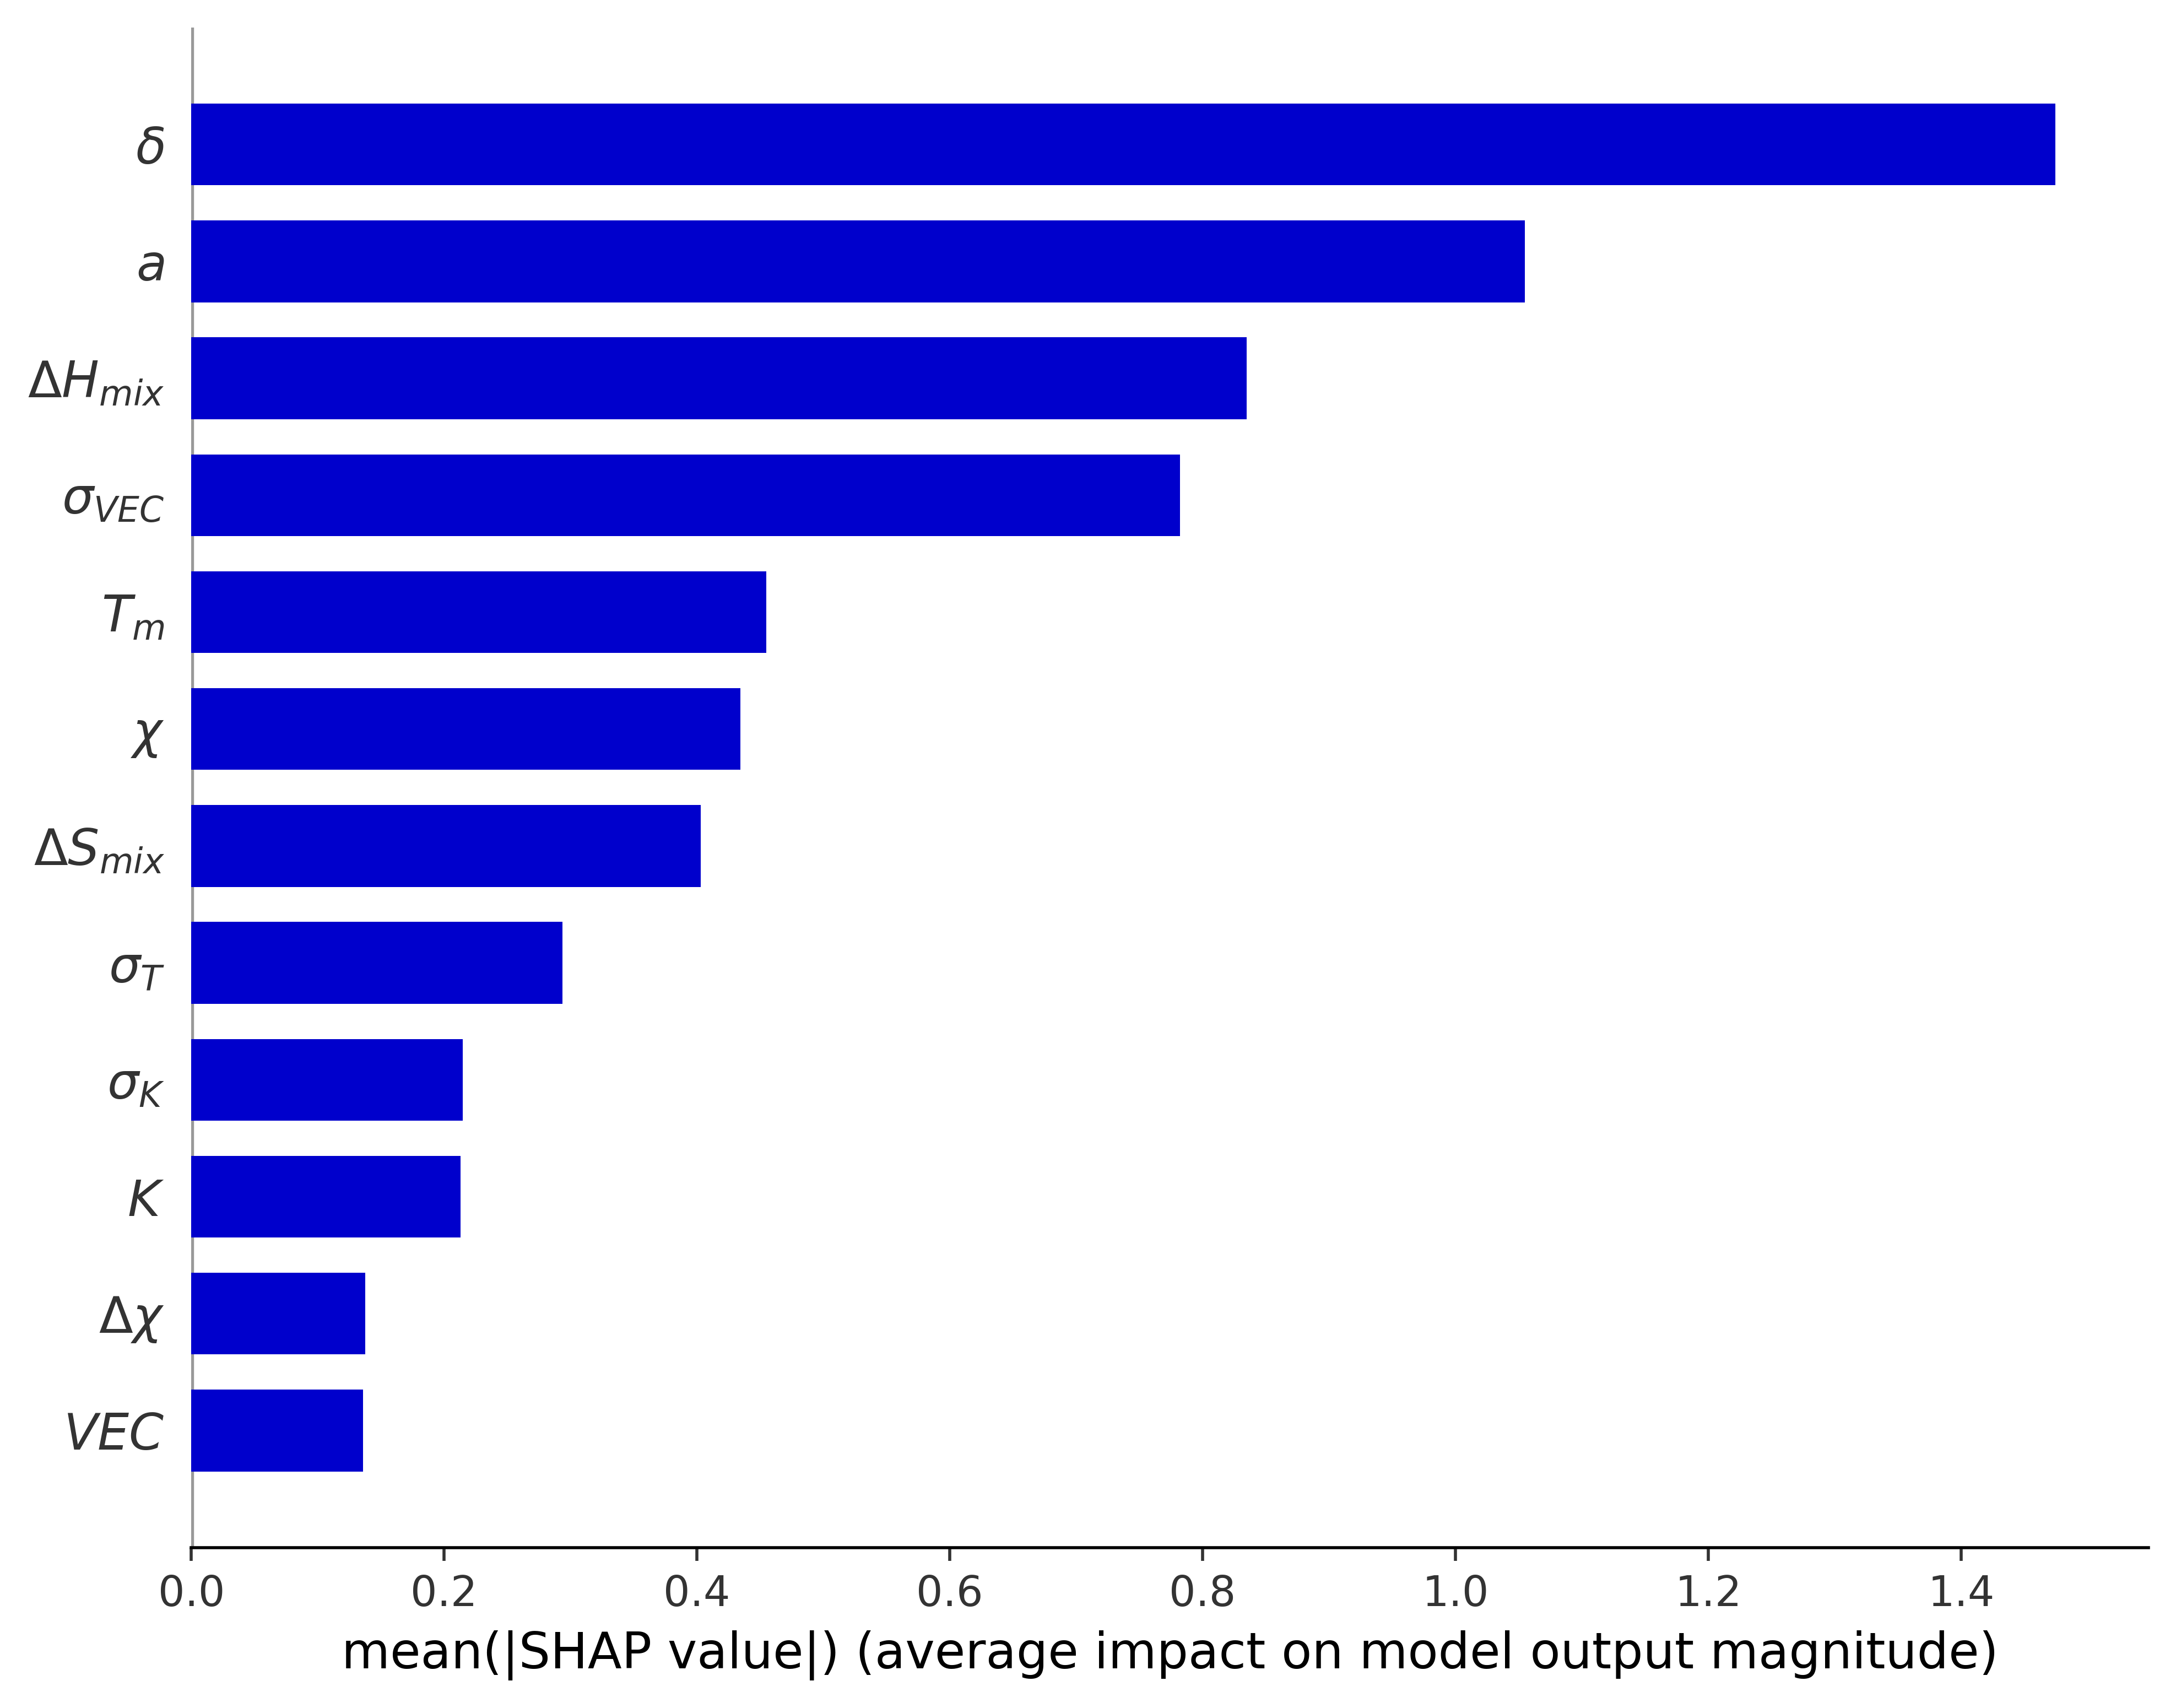

In [25]:
plt.figure(dpi=500)
shap.summary_plot(shap_values[0], X_train, color =  "#0000CC",plot_type="bar")

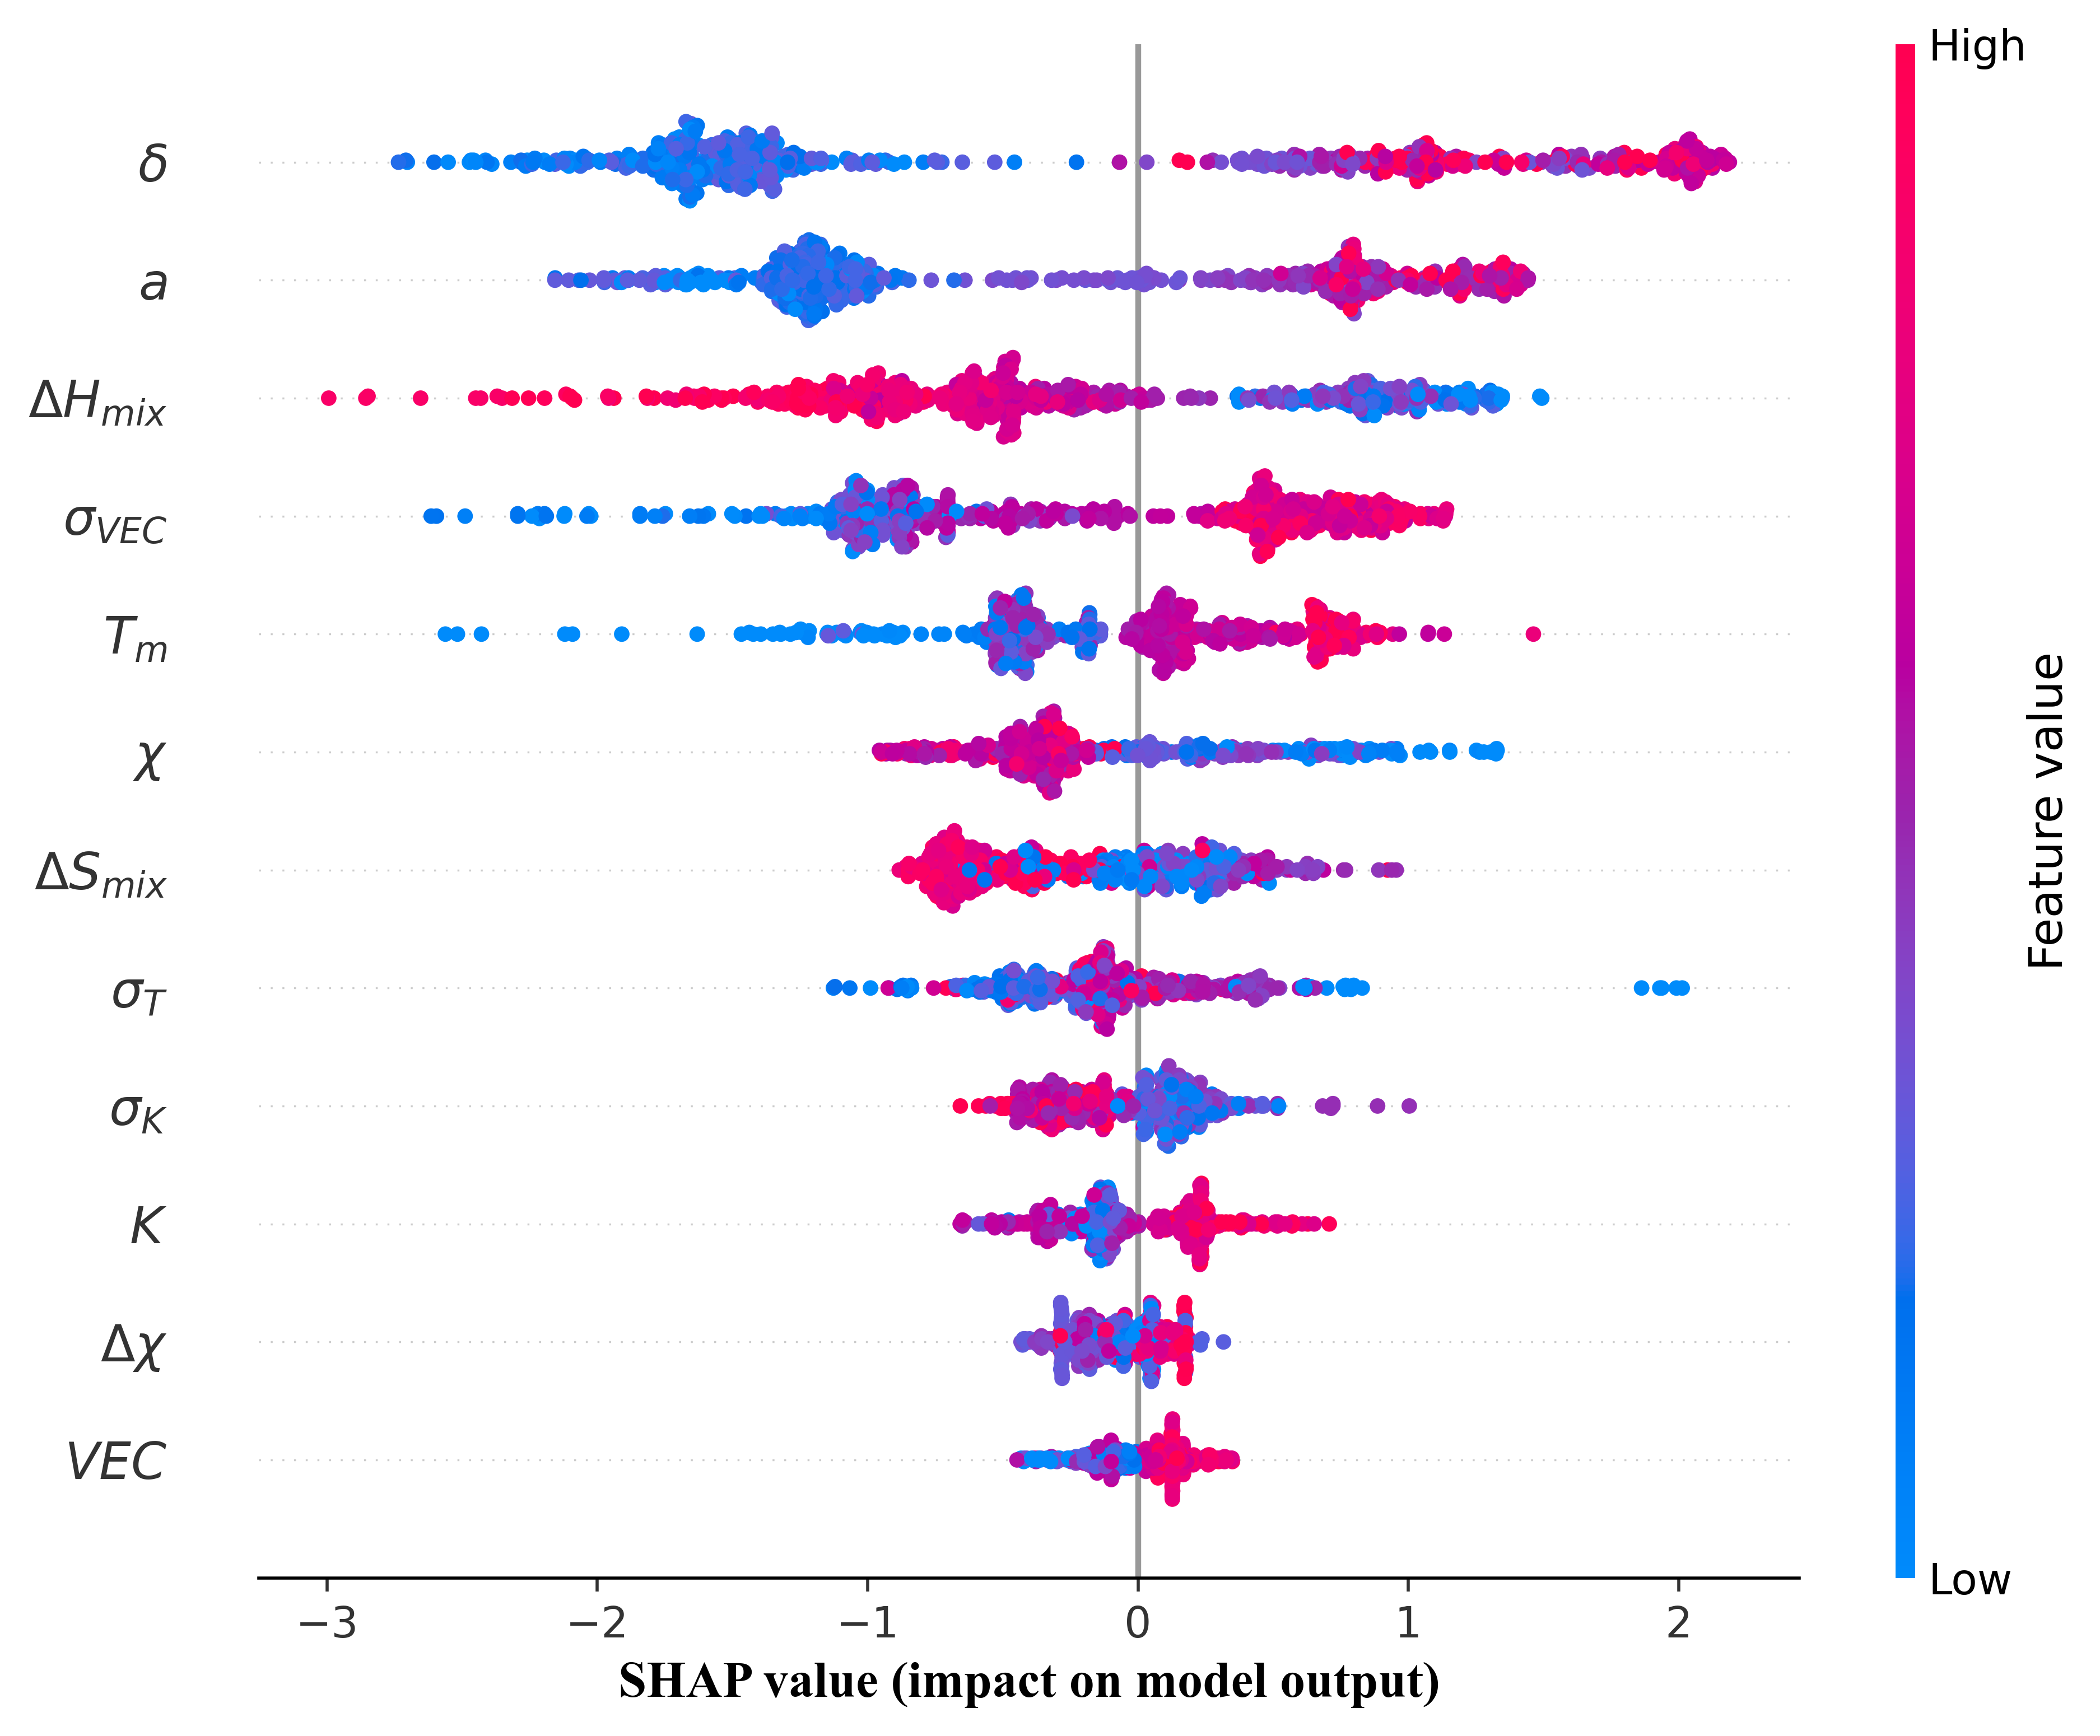

In [33]:
# SHAP值解释
plt.figure(dpi=500)
plt.xlabel('Score',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
shap.summary_plot(shap_values[0], X_train)


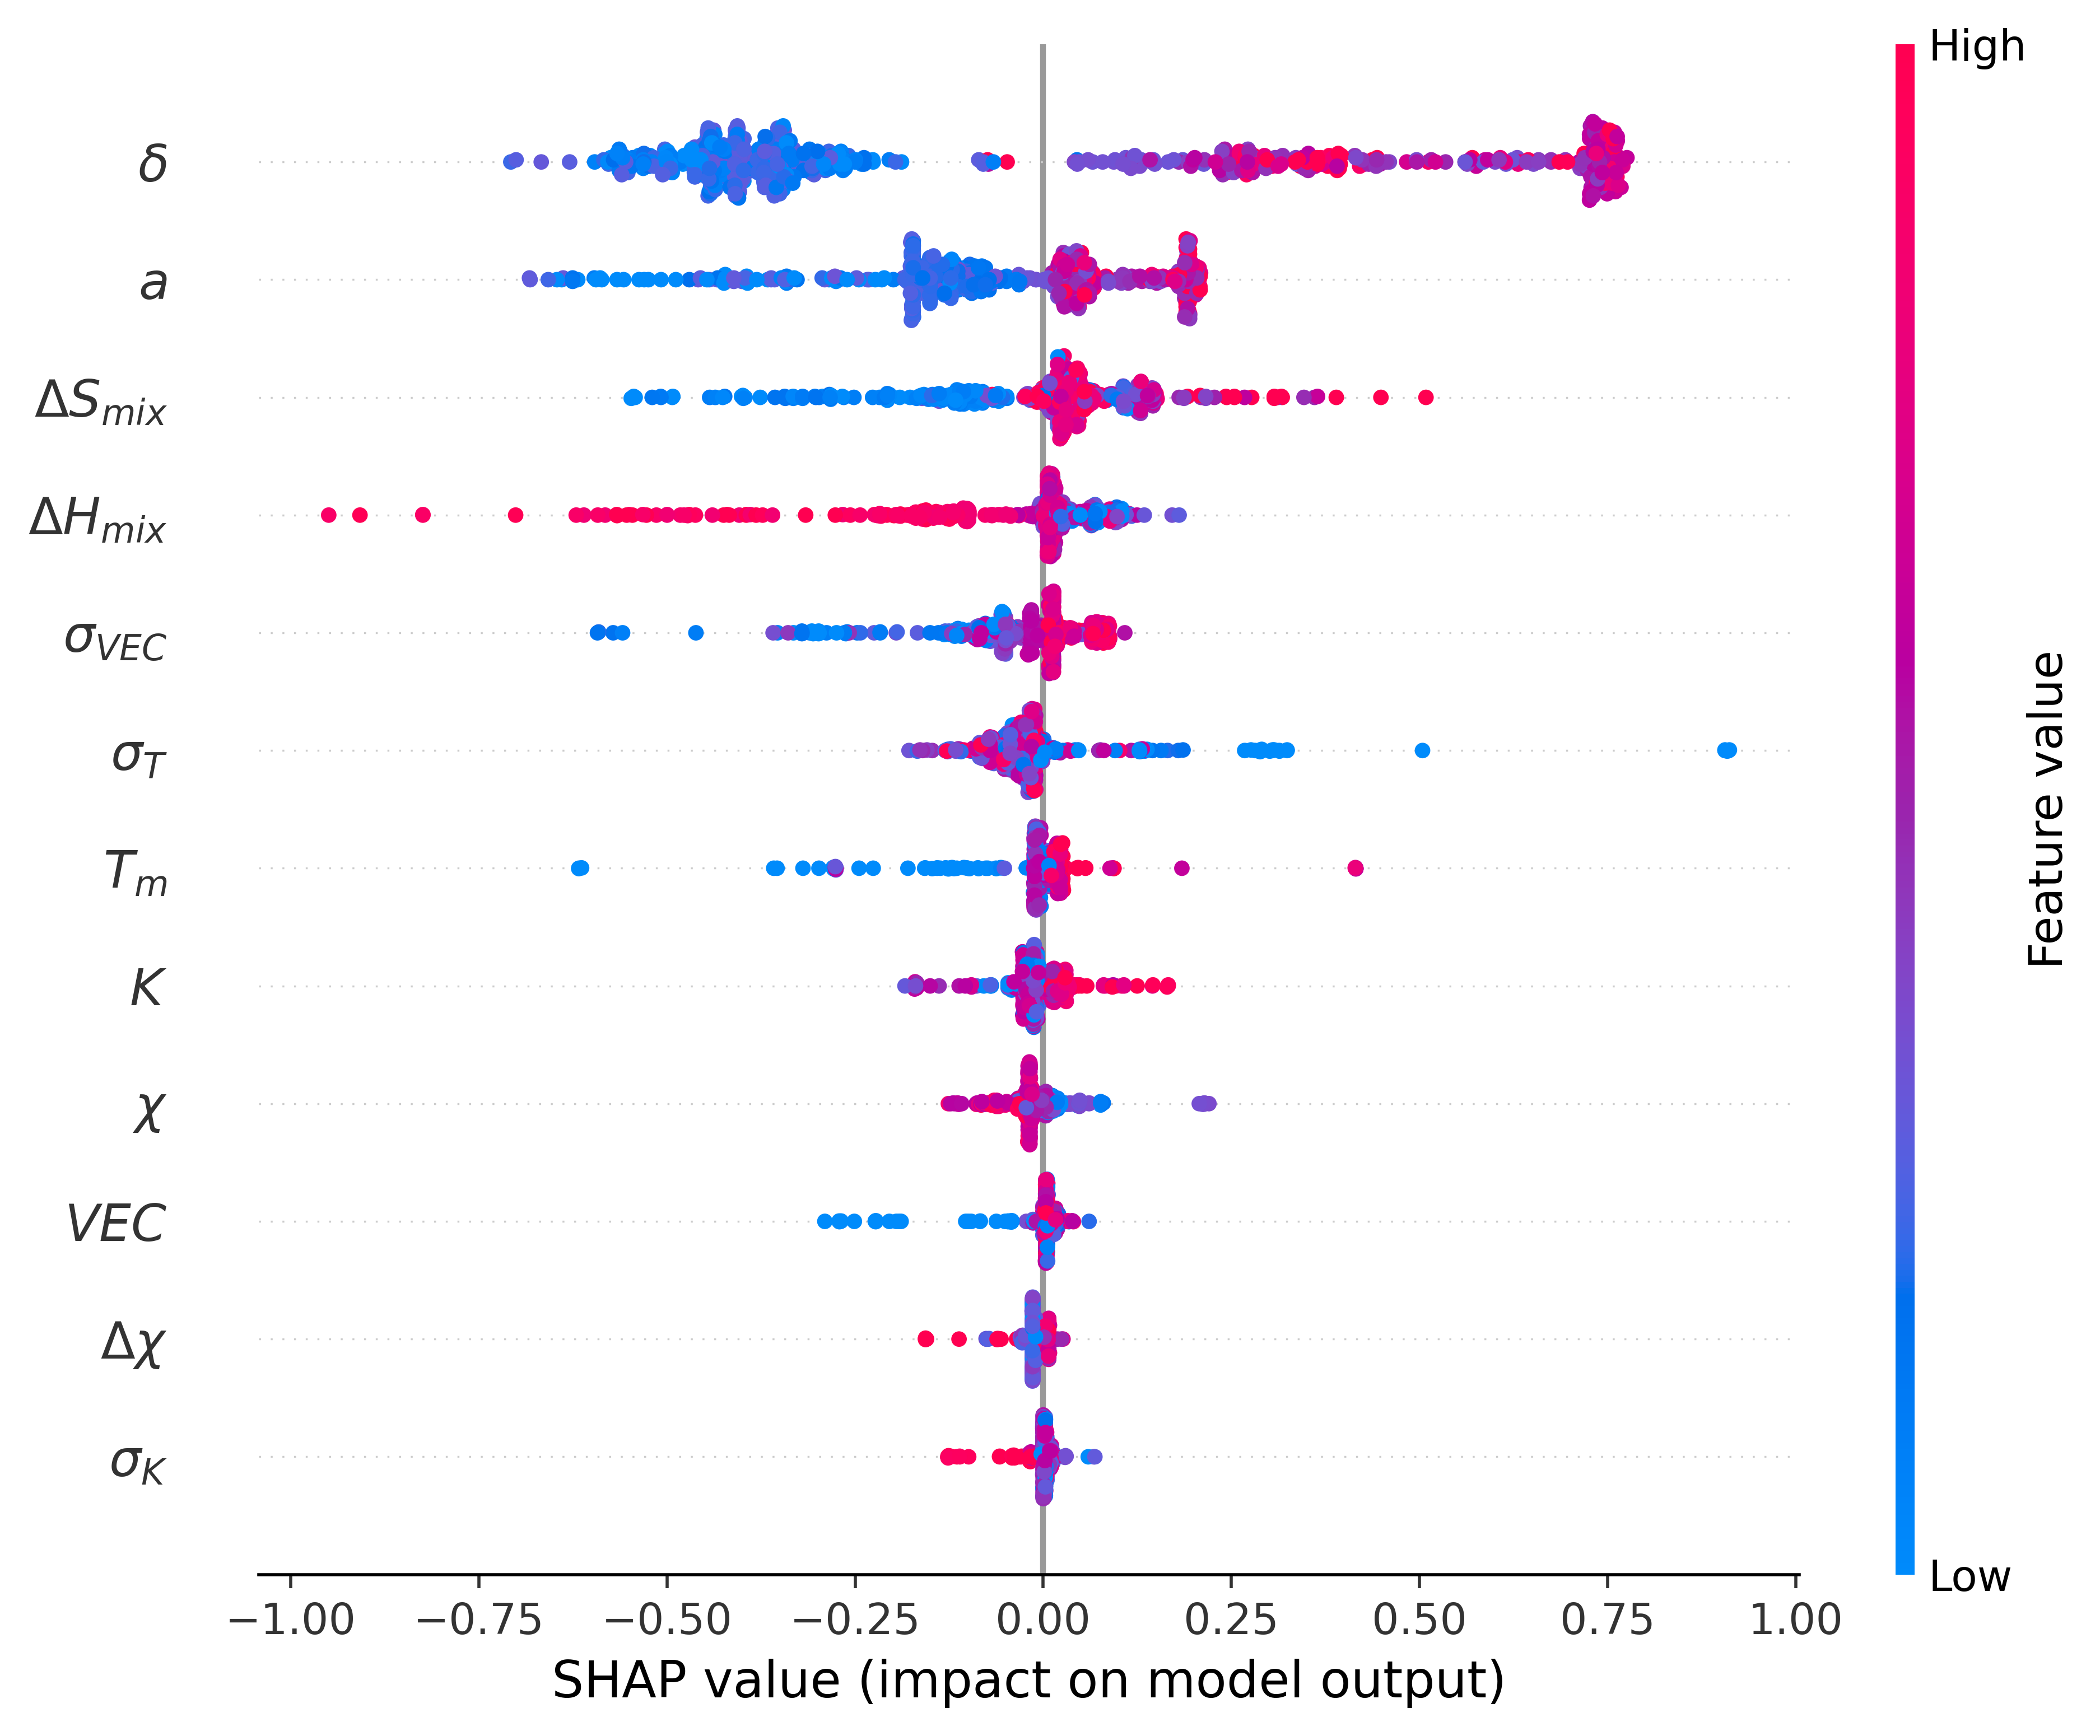

In [19]:
# SHAP值解释
plt.figure(dpi=500)
shap.summary_plot(shap_values[0], X_train)


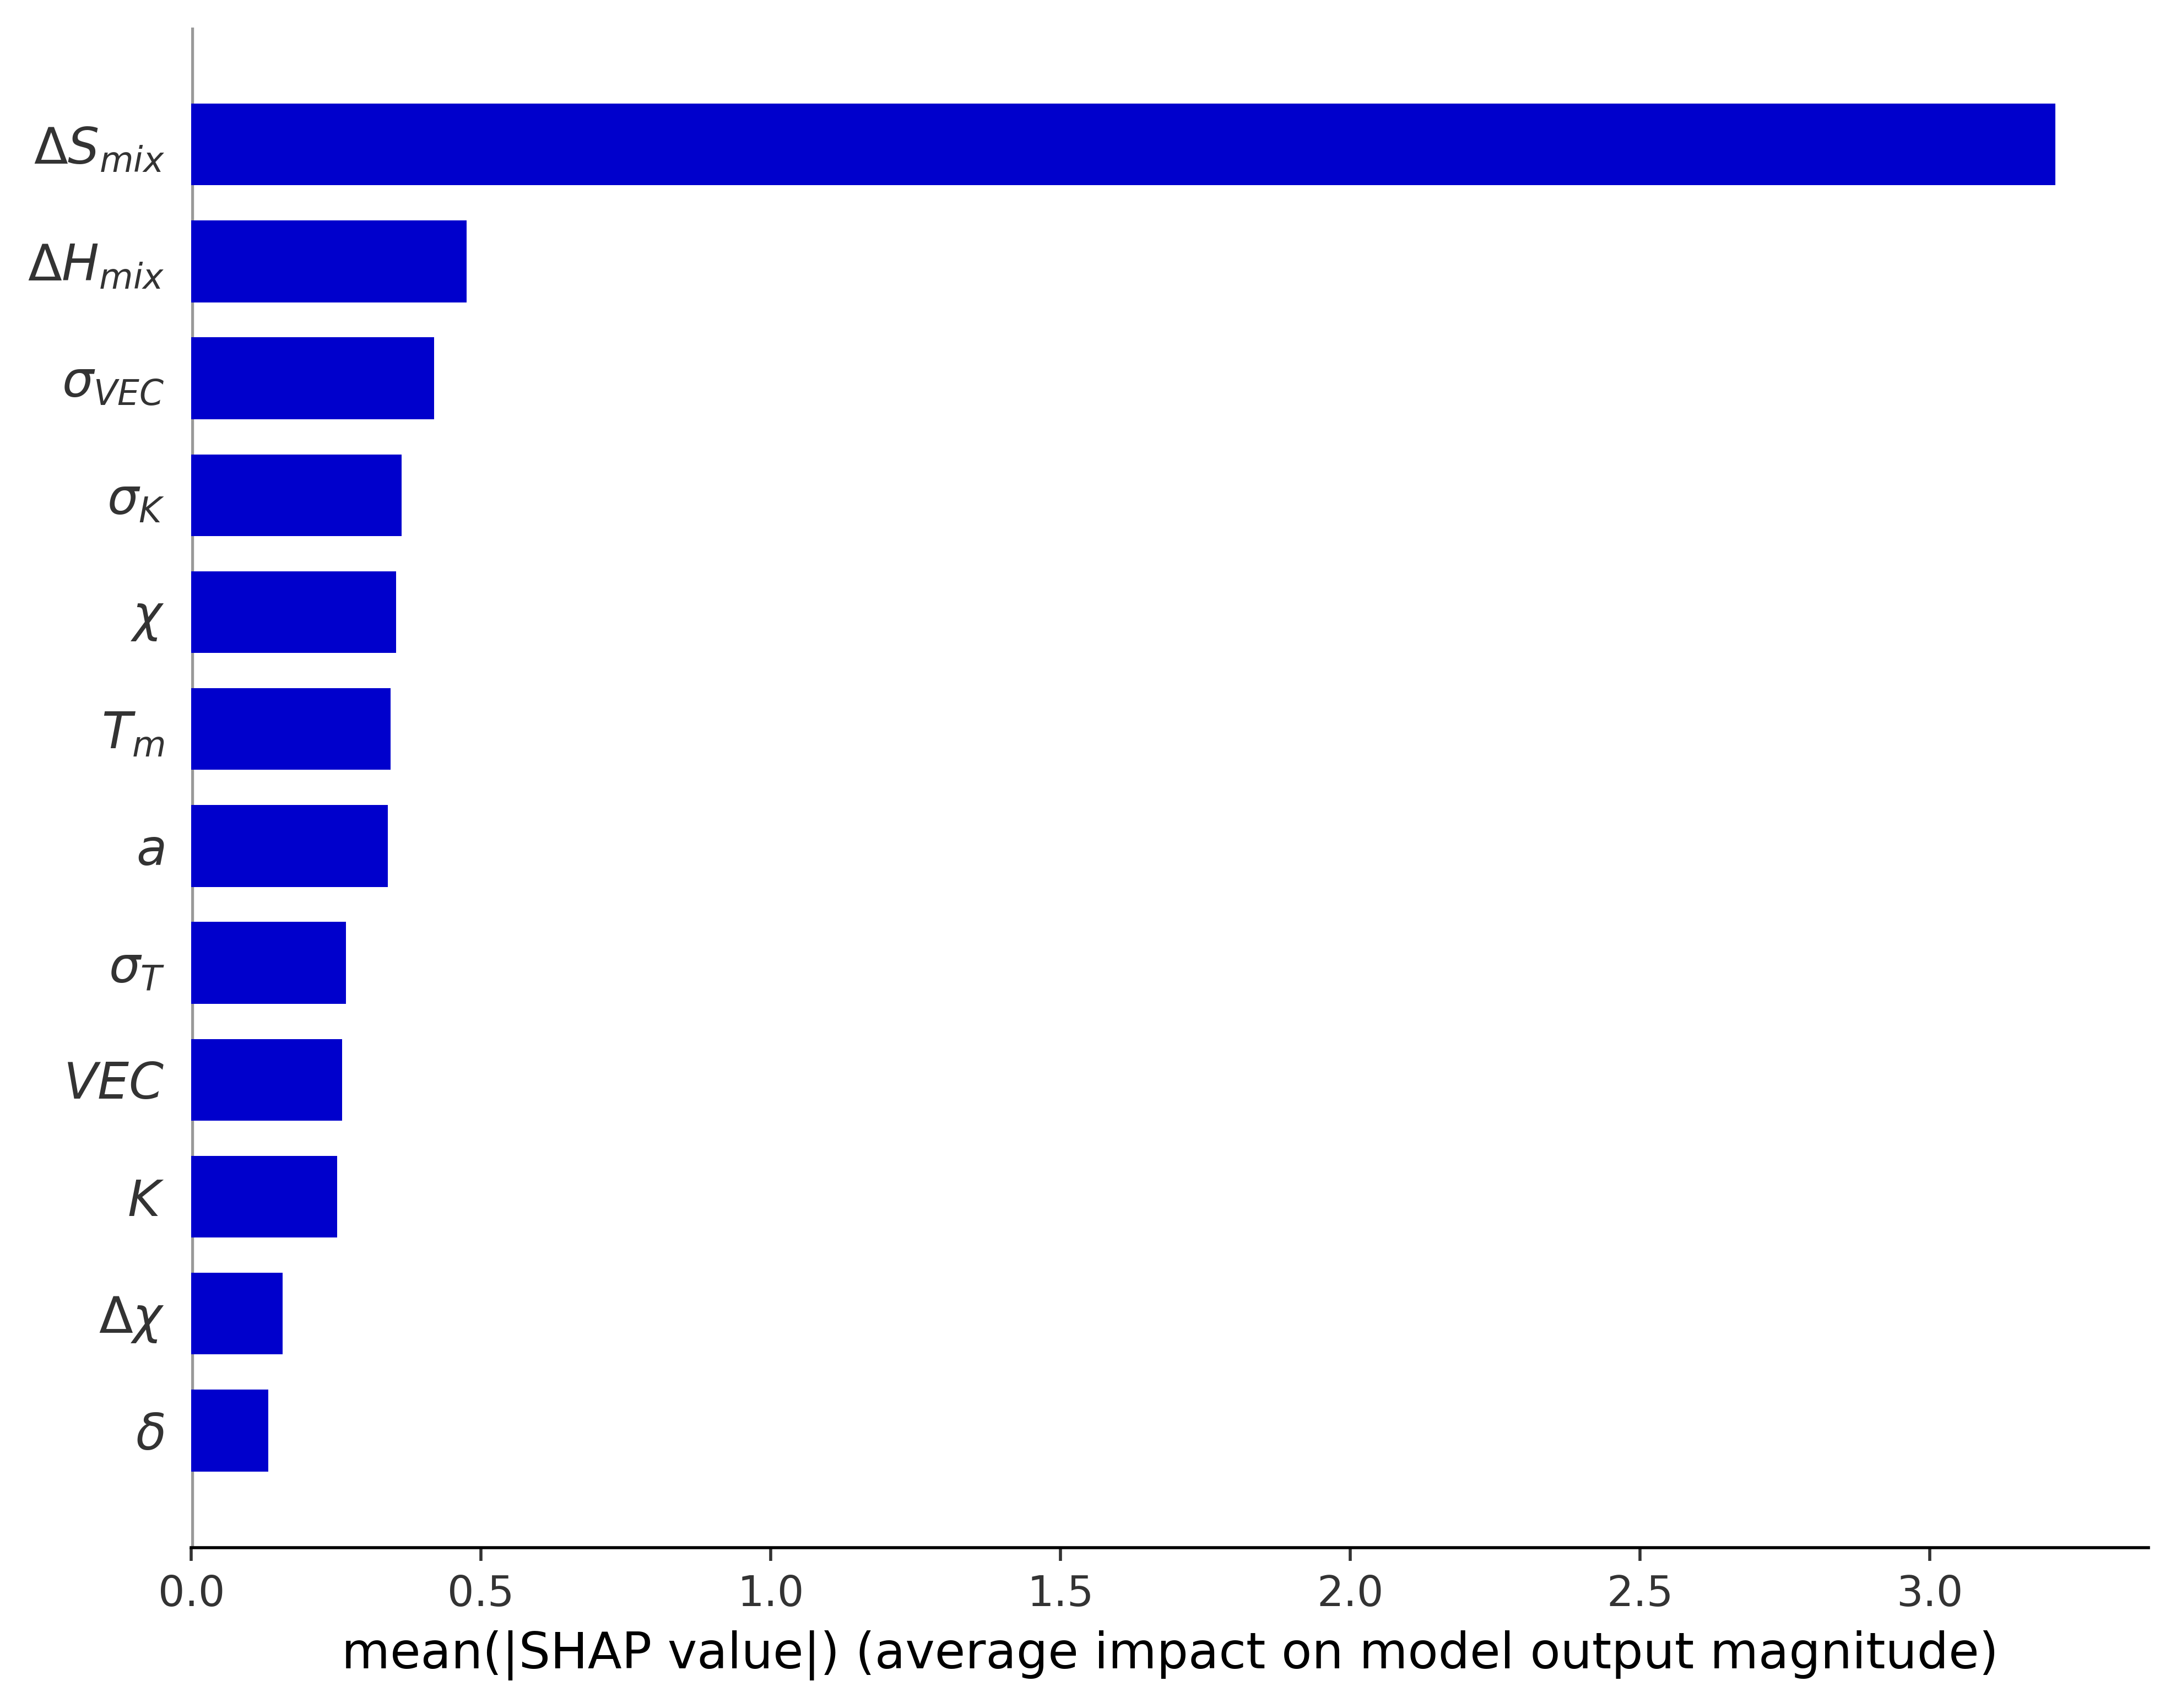

In [27]:
plt.figure(dpi=500)
shap.summary_plot(shap_values[1], X_train, color =  "#0000CC",plot_type="bar")

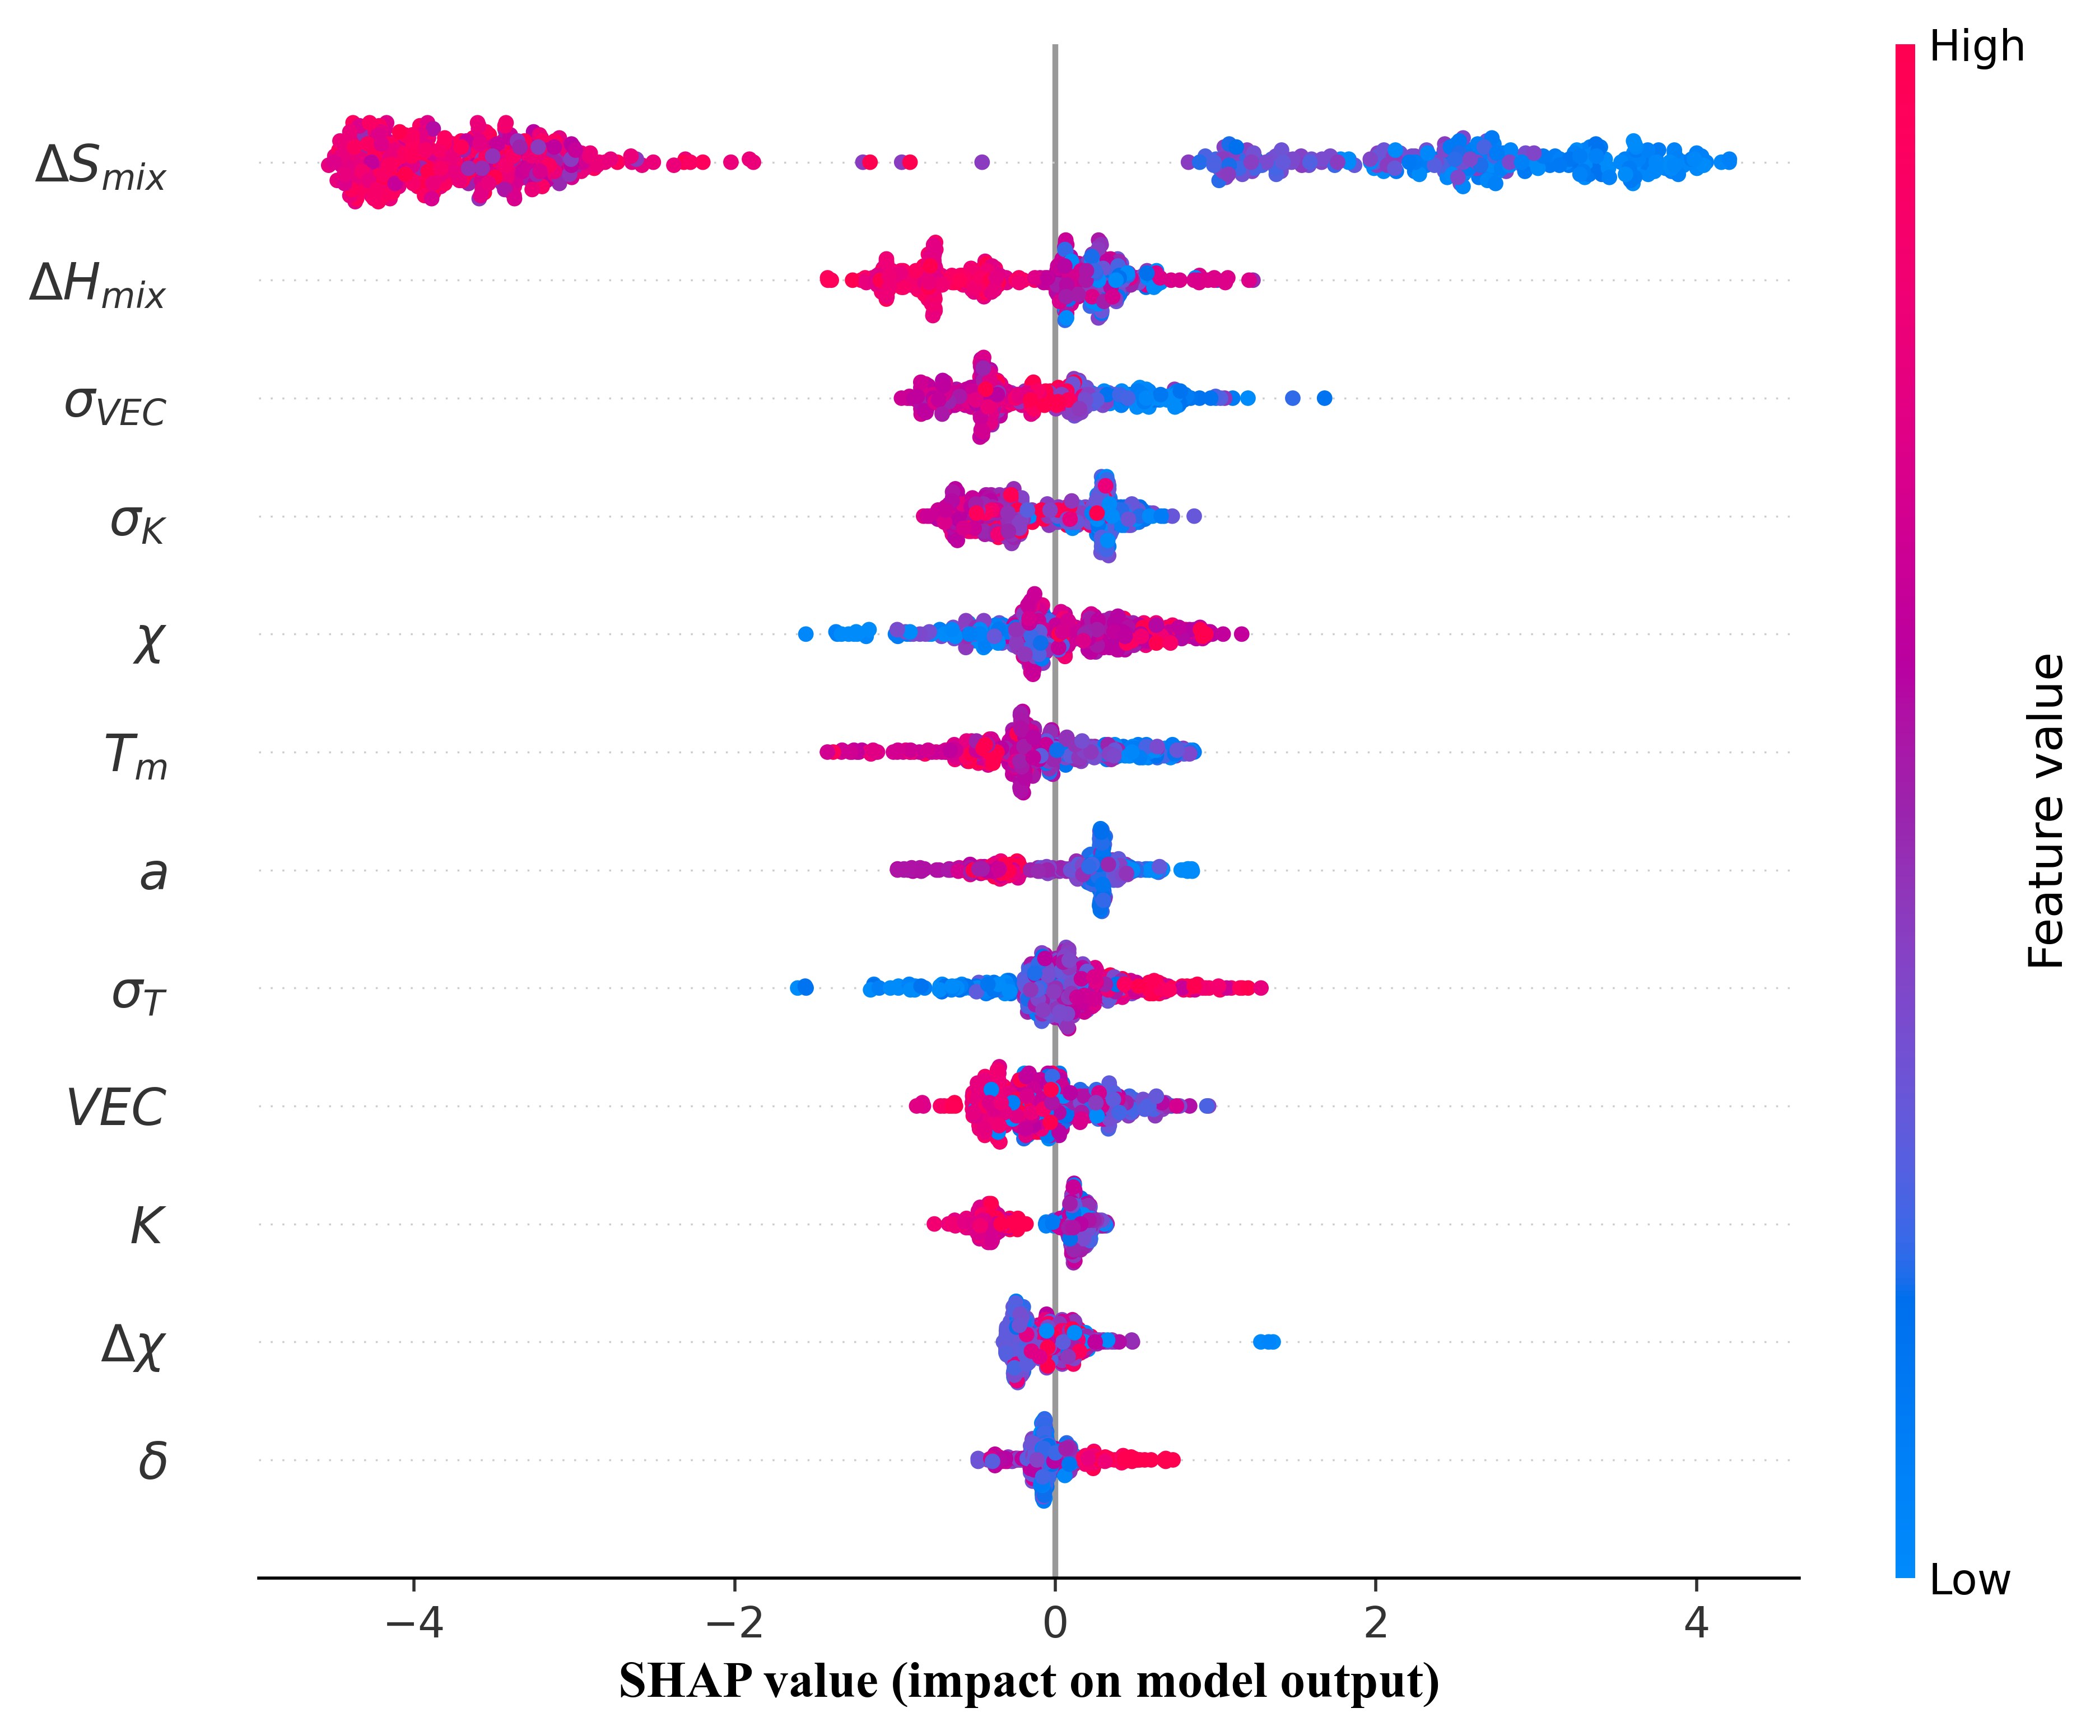

In [34]:
plt.figure(dpi=500)
plt.xlabel('Score',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
shap.summary_plot(shap_values[1], X_train)
# 图4



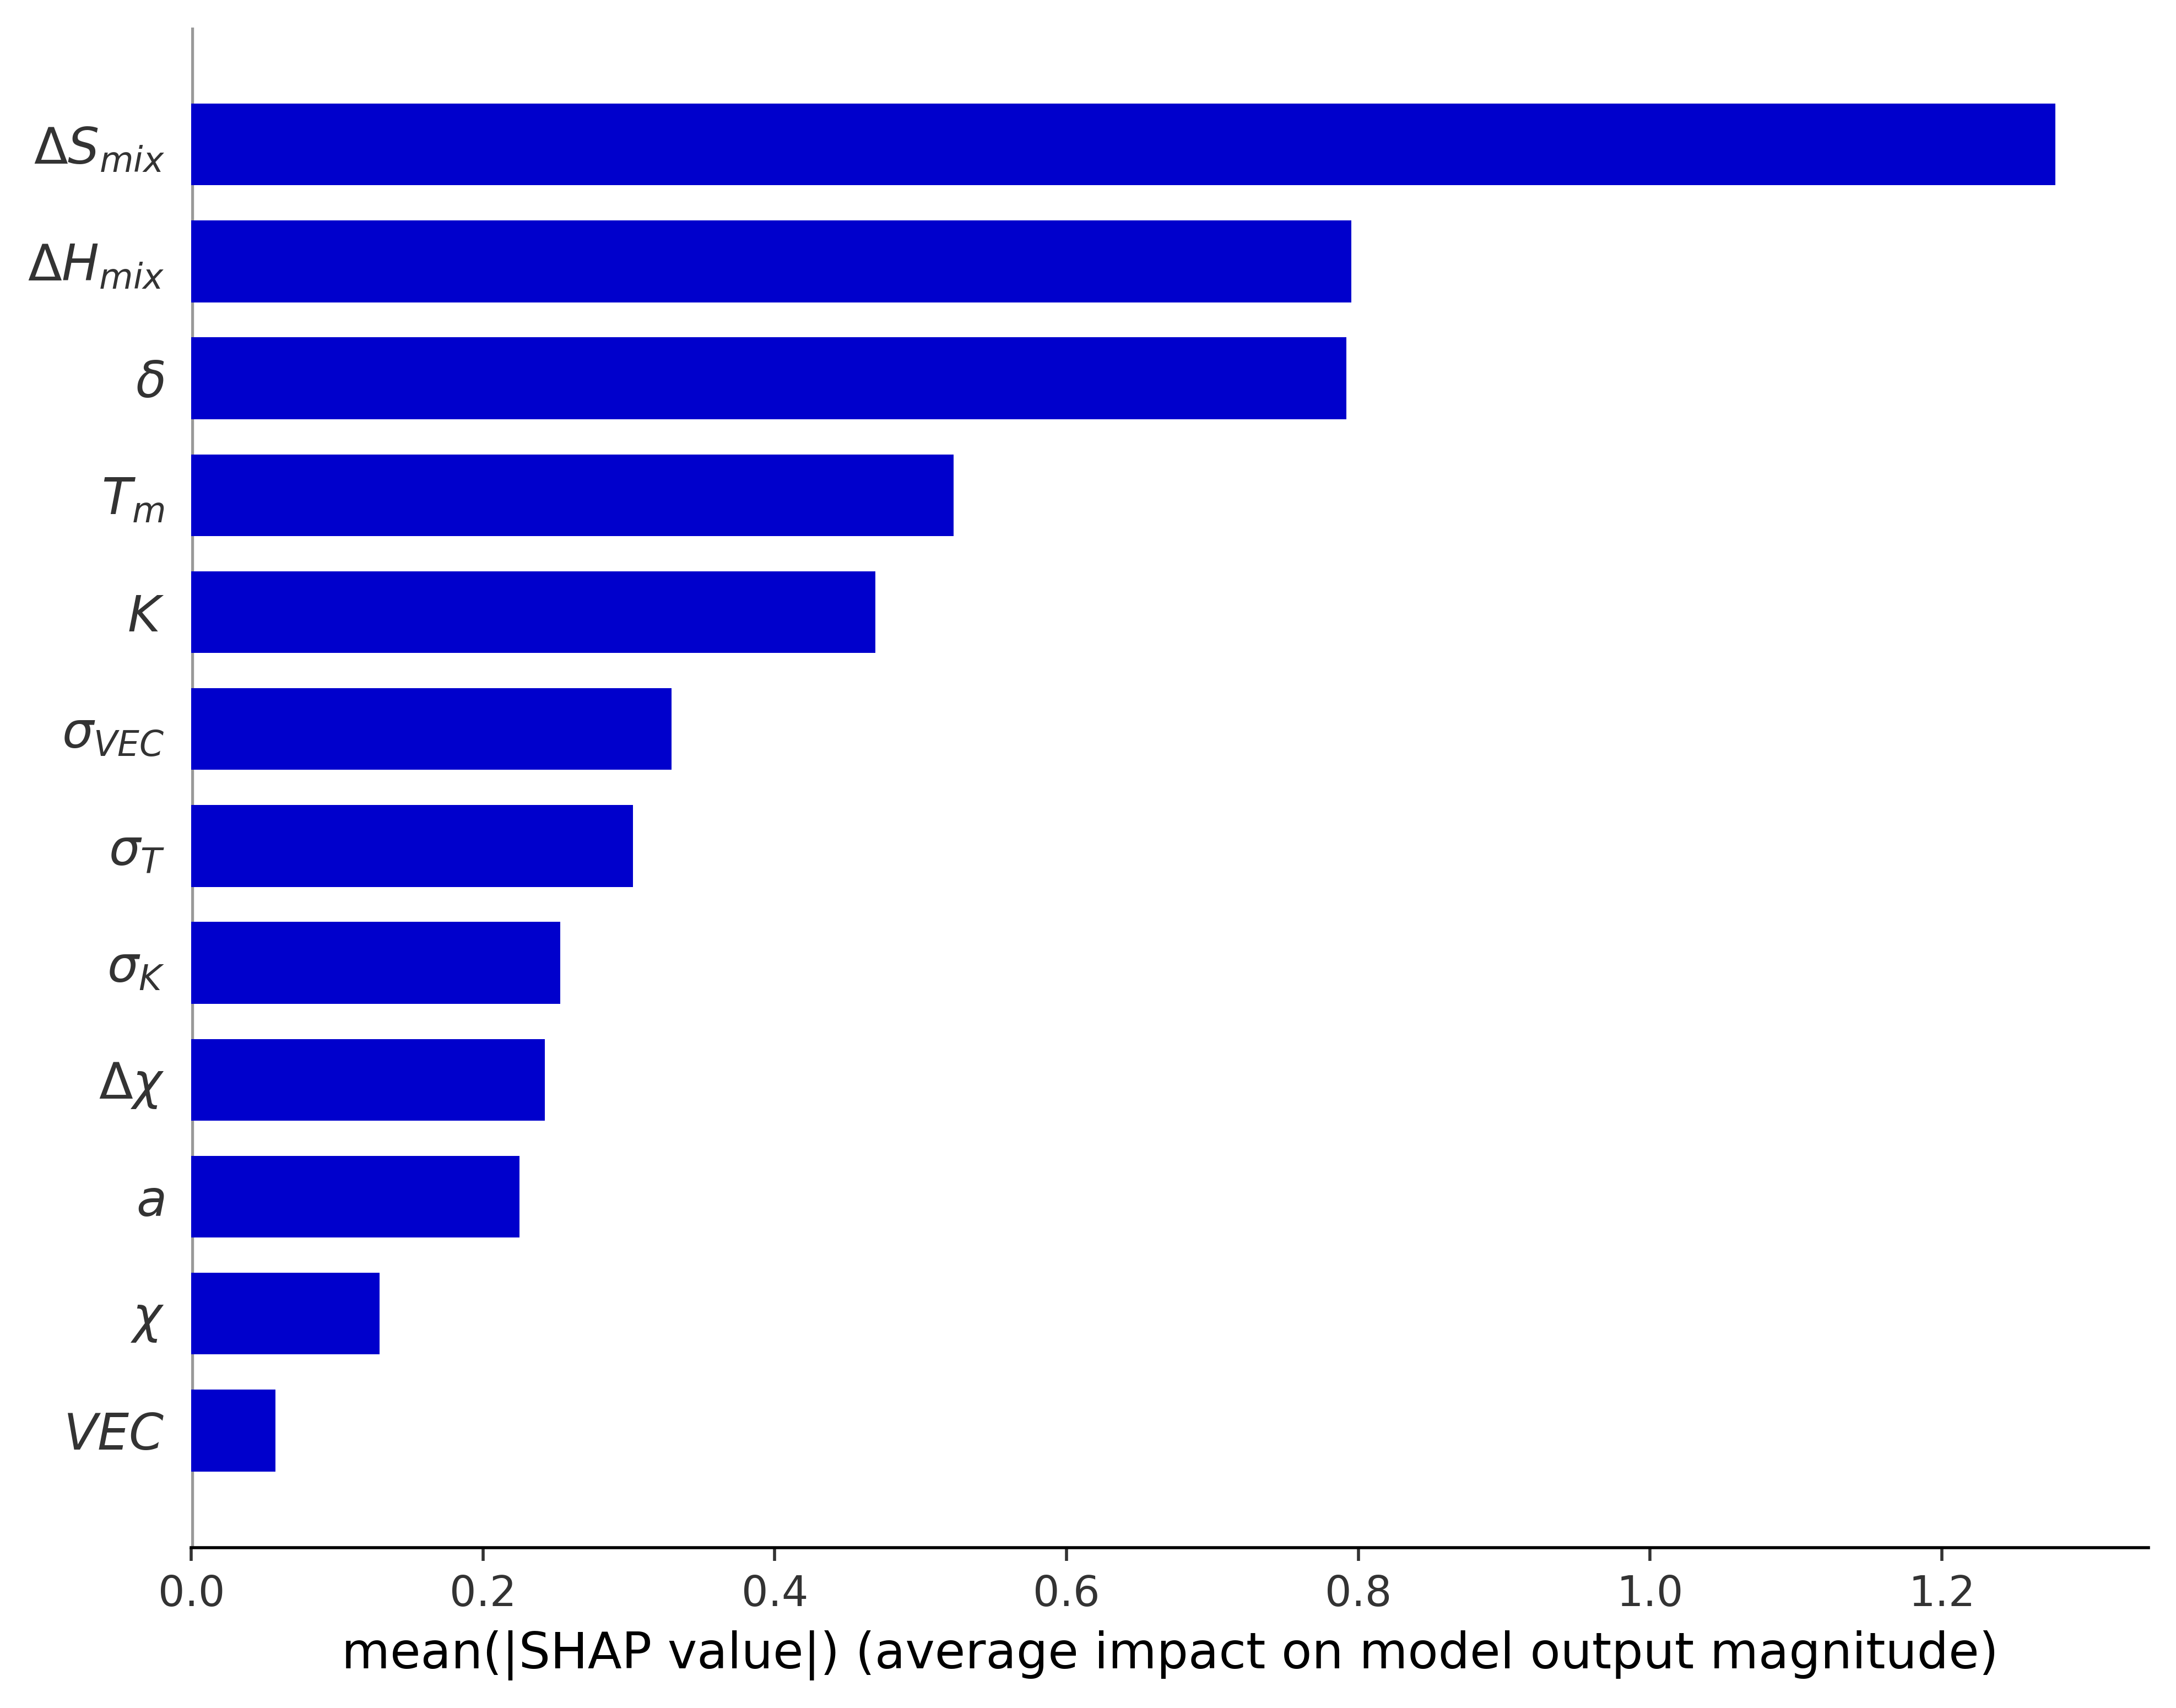

In [29]:
plt.figure(dpi=500)
shap.summary_plot(shap_values[2], X_train, color =  "#0000CC",plot_type="bar")

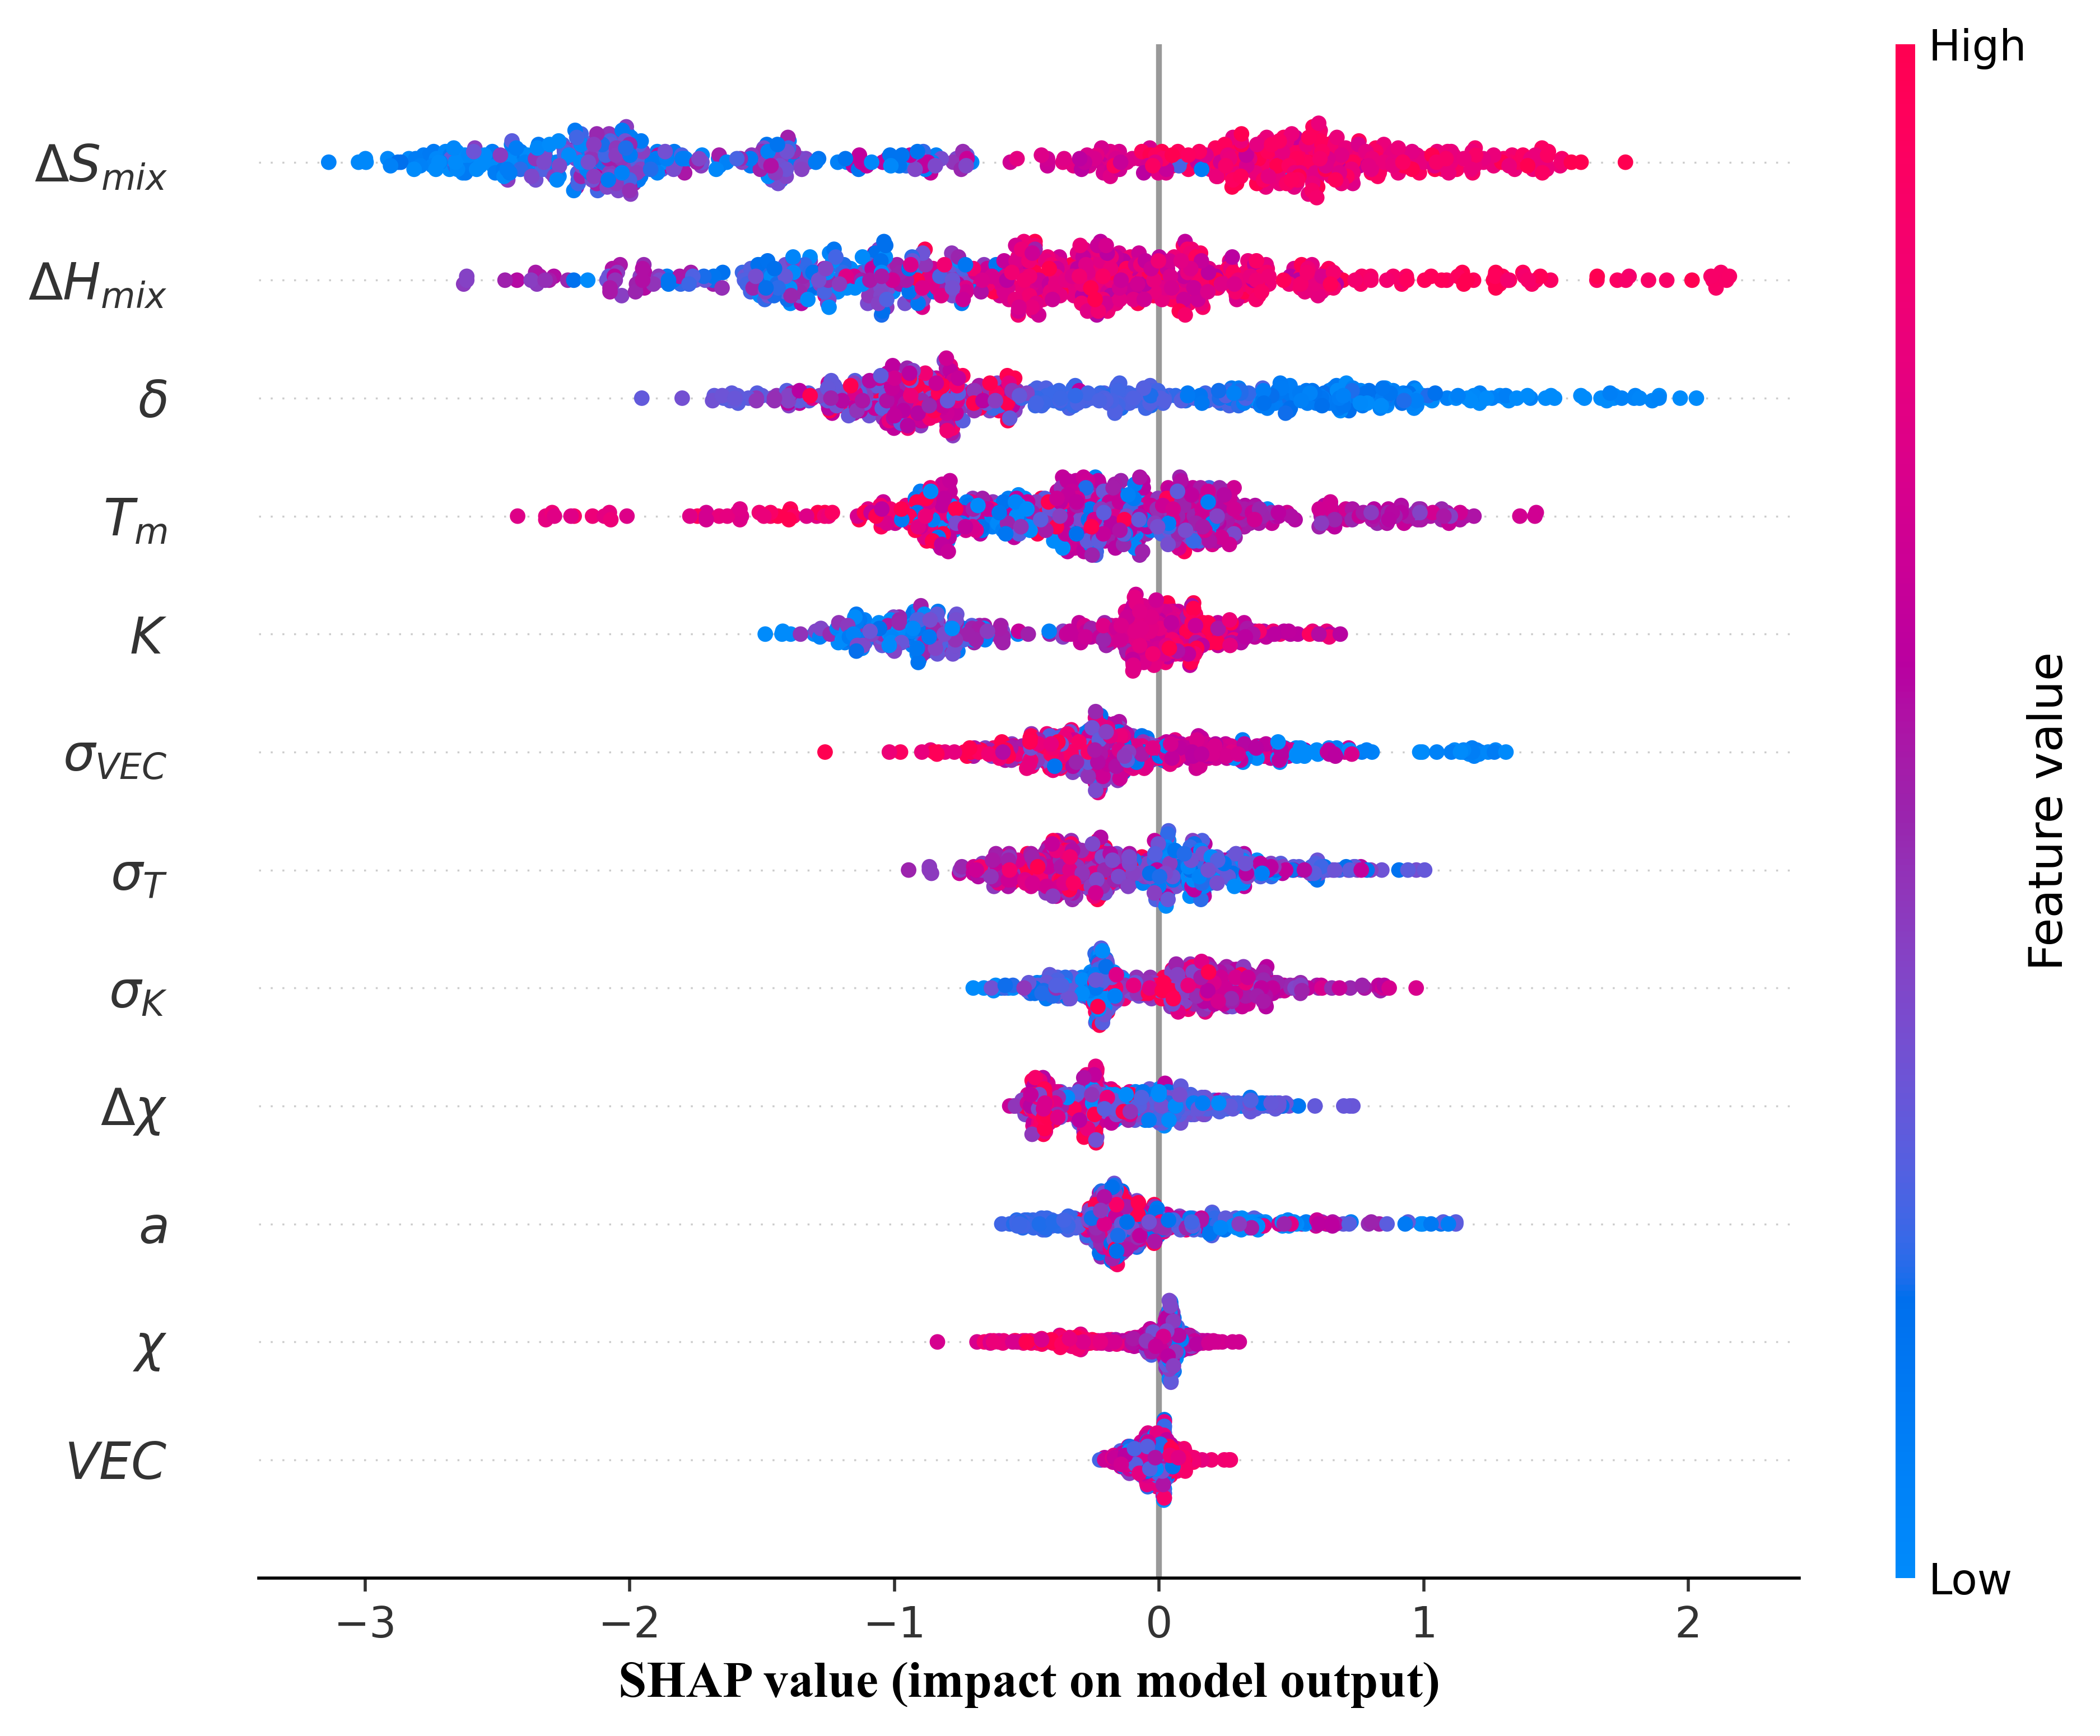

In [35]:
plt.figure(dpi=500)
plt.xlabel('Score',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
shap.summary_plot(shap_values[2], X_train)

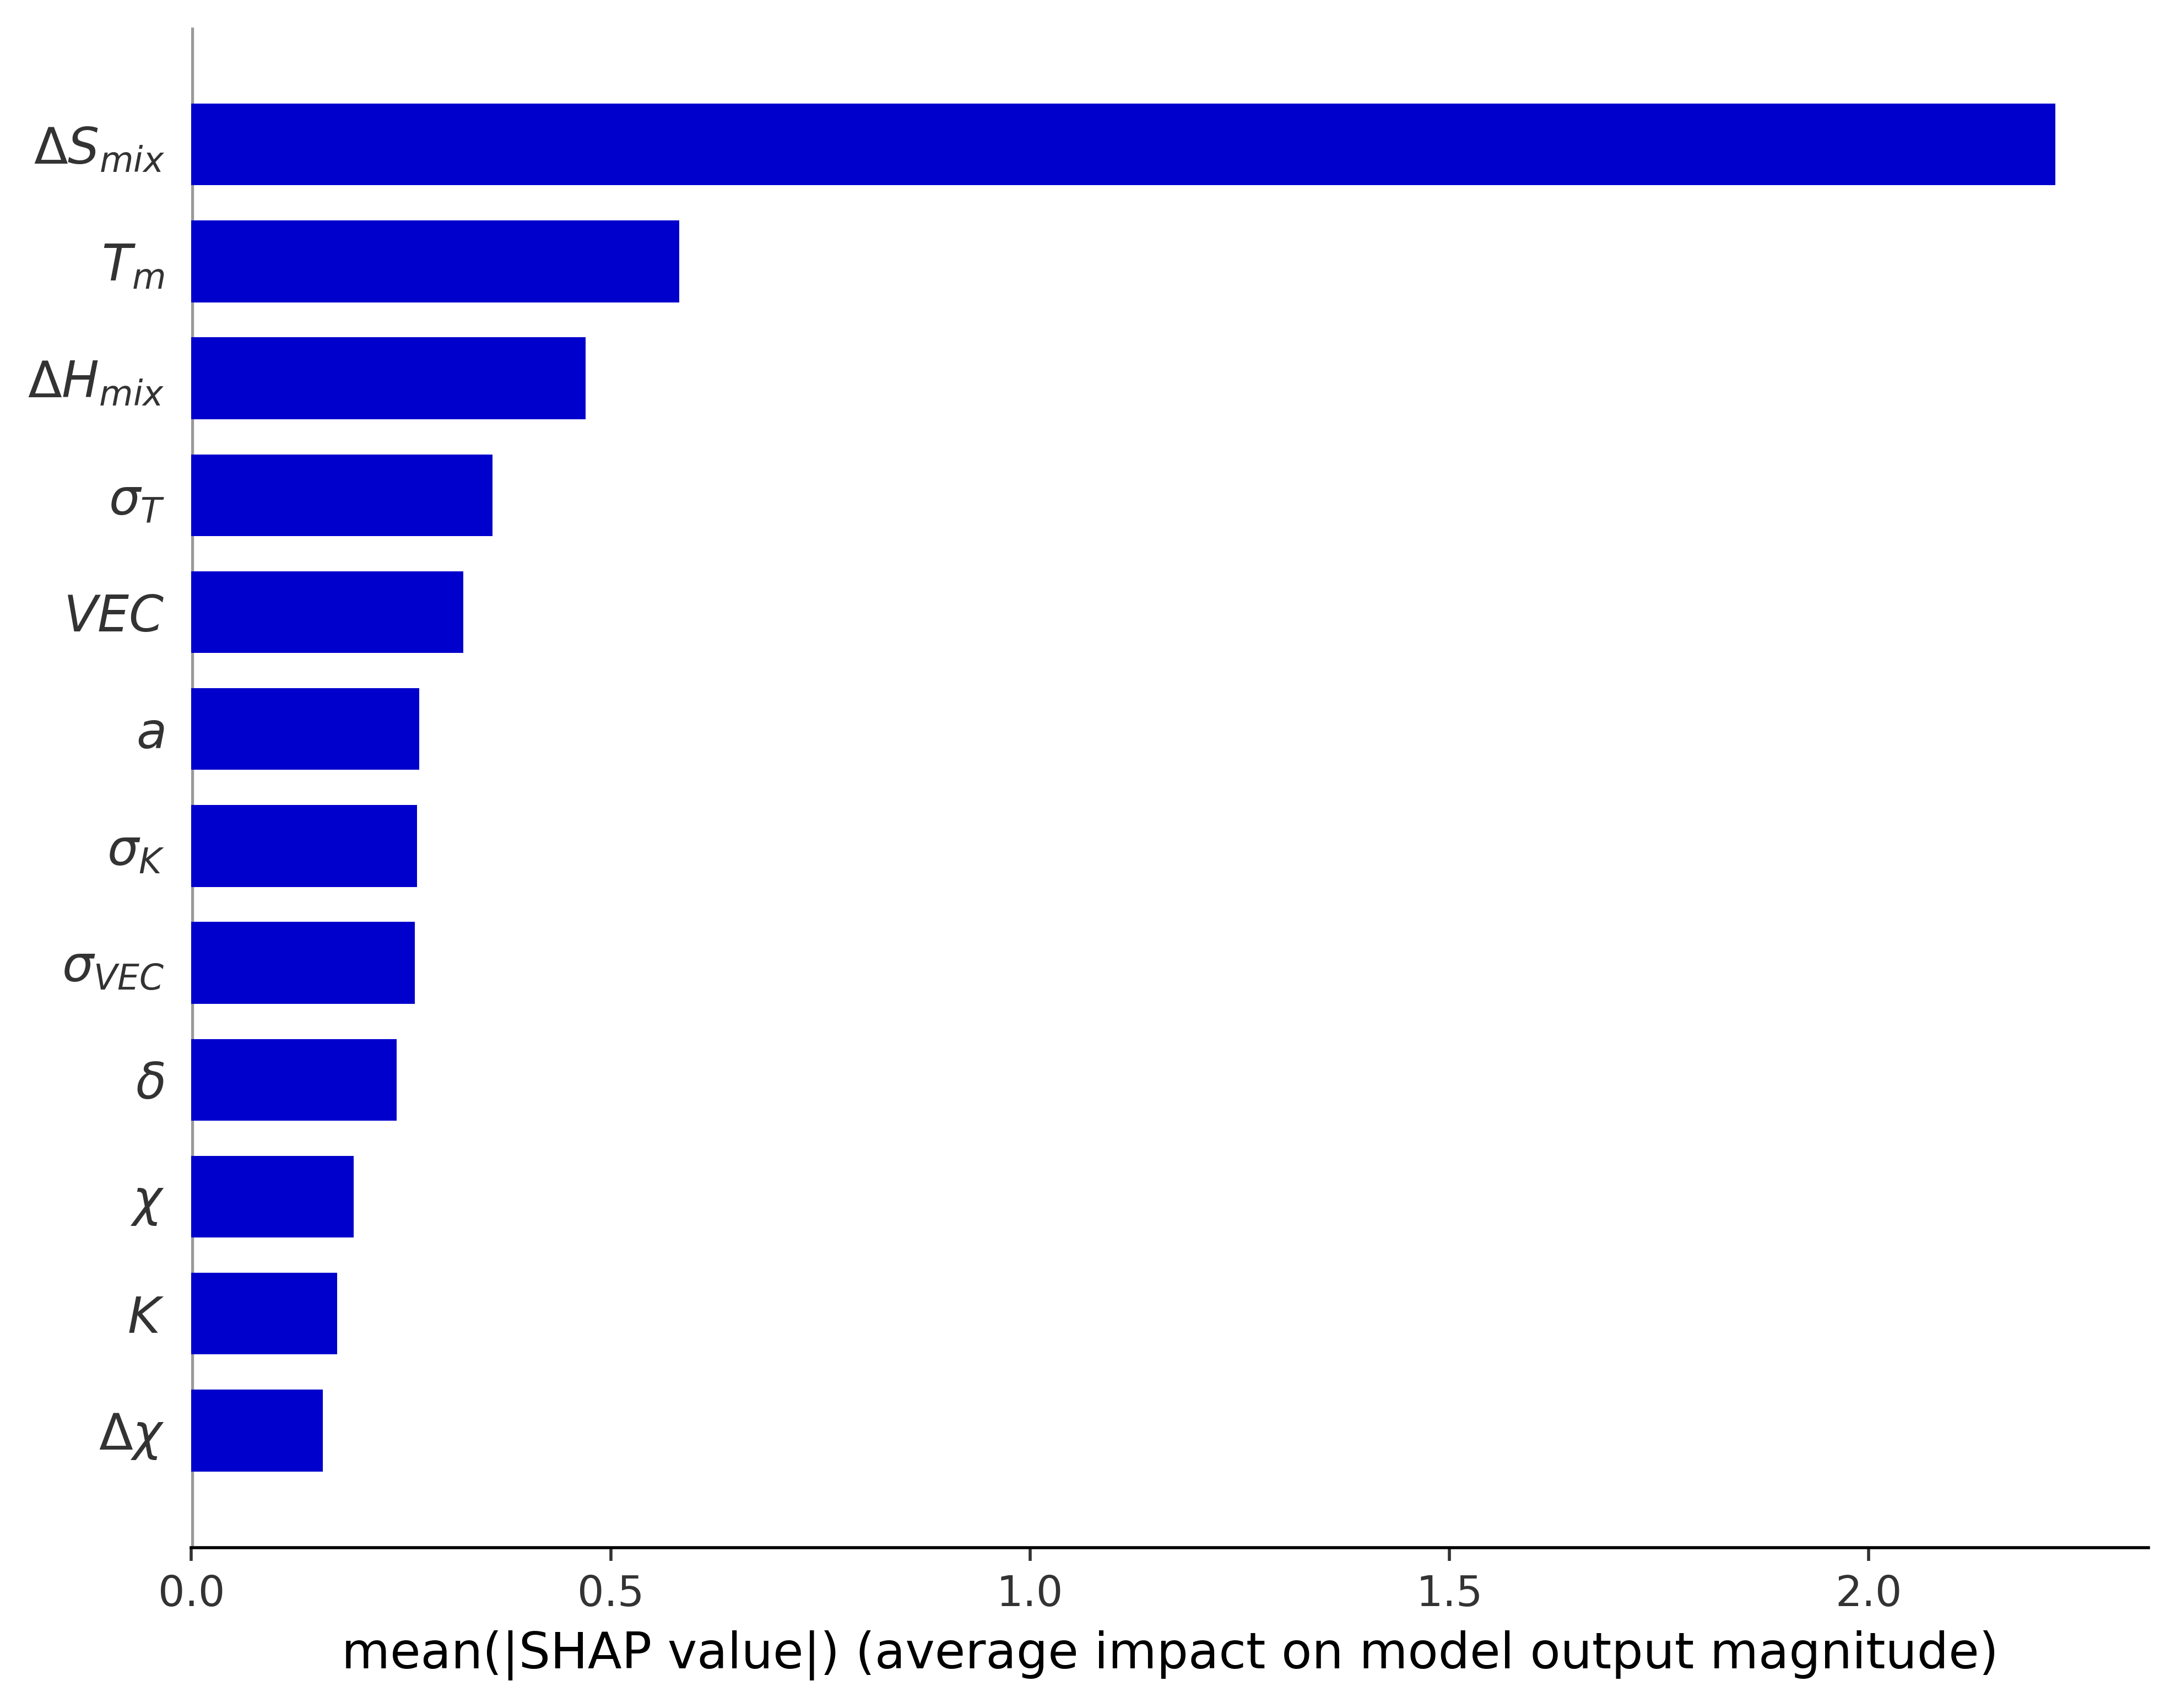

In [31]:
plt.figure(dpi=500)
shap.summary_plot(shap_values[3], X_train, color =  "#0000CC",plot_type="bar")

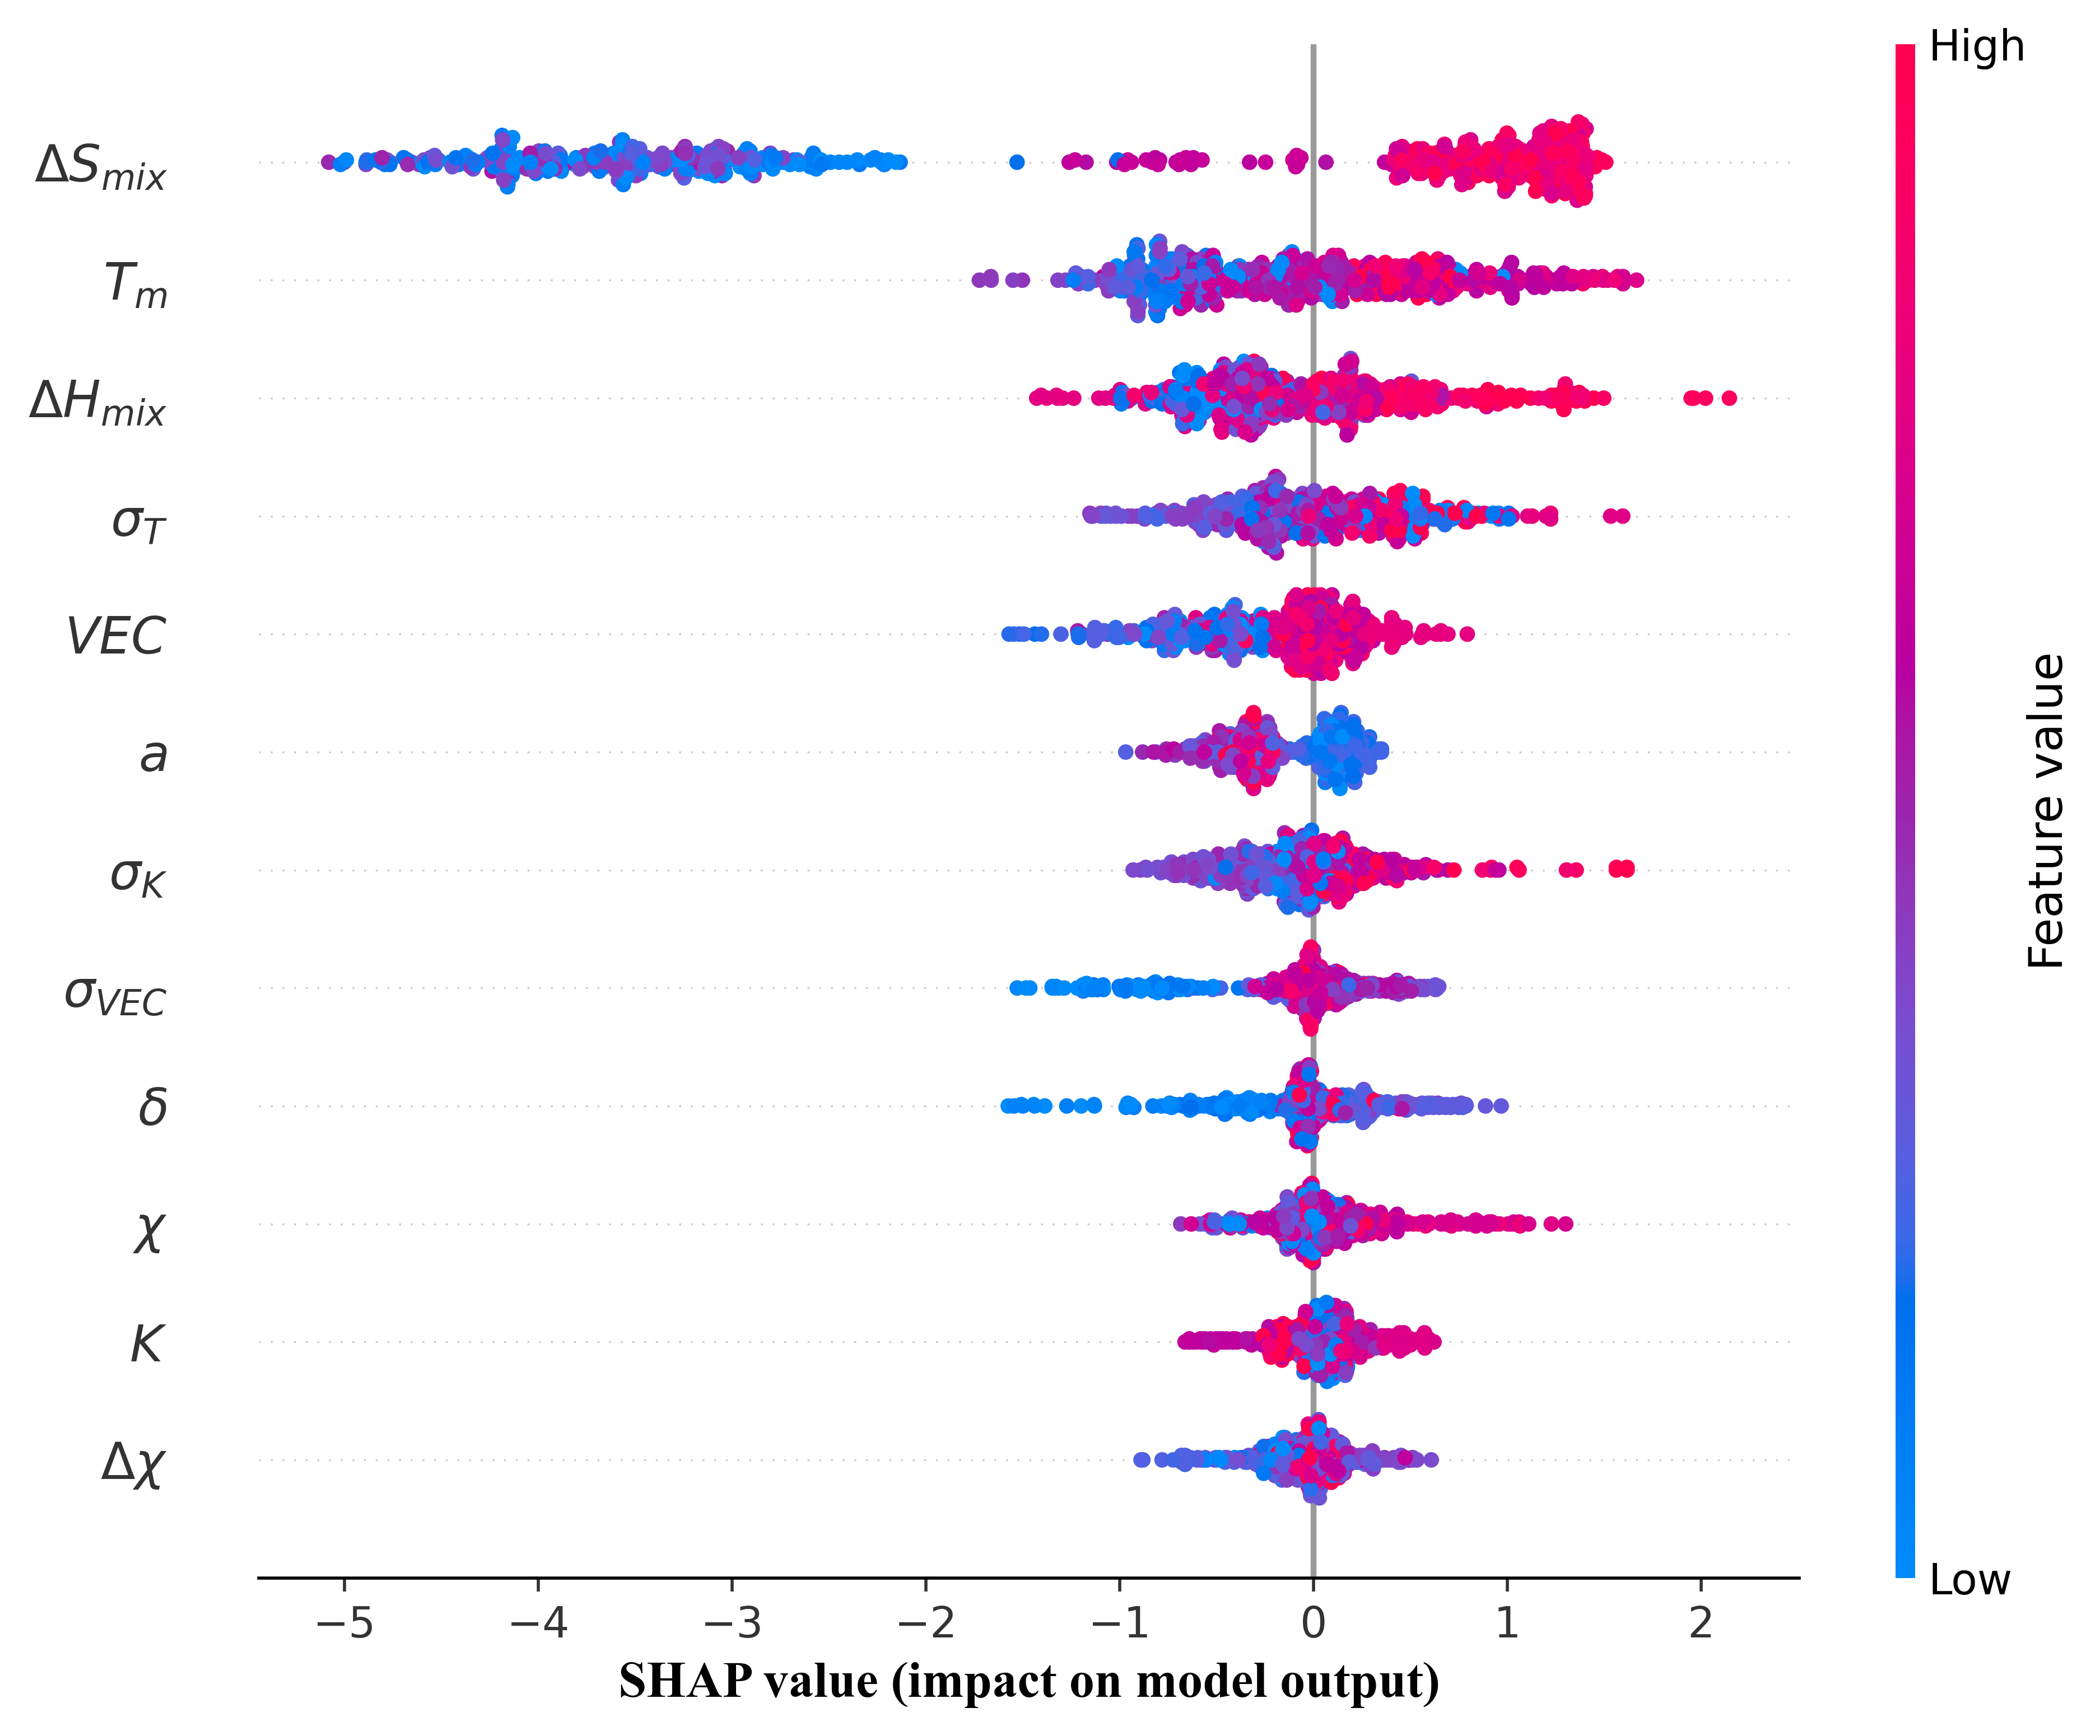

In [36]:
plt.figure(dpi=500)
plt.xlabel('Score',fontproperties="Times New Roman",fontsize=12,fontweight='bold')
shap.summary_plot(shap_values[3], X_train)